In [59]:
# pip install plotly
#pip install jupyter-dash


In [137]:
from IPython.display import Markdown

greetings = "Python EDA Project"
name = "Amazon Sales"


## {greetings} {name}

## Background
## Objective
## EDA
## Summary
## Future Work



In [138]:
import pandas as pd
import mplppt
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from transformers import pipeline
%matplotlib inline
import seaborn as sns
import kaleido
import re
import os
import numpy as np
import plotly.express as px
import statsmodels.api as sm
pd.set_option('display.max_colwidth', None) 

In [139]:
if not os.path.exists("images"):
    os.mkdir("images")

In [140]:
df=pd.read_csv("amazon.csv")

In [141]:
newdf=df[['product_id','product_name','category','discounted_price','actual_price','discount_percentage','rating','rating_count','about_product','user_id','user_name','review_id','review_title','review_content']].copy()

In [142]:
print(newdf.dtypes)

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
dtype: object


In [143]:
newdf.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
dtype: int64

In [144]:
newdf['actual_price']=newdf.actual_price.str.replace('₹','')
newdf['actual_price']=newdf.actual_price.str.replace(',','')
newdf['actual_price']=newdf.actual_price.astype('float64')
#newdf['actual_price']=pd.to_numeric(newdf['actual_price'], errors='coerce')

# newdf['actual_price']=newdf['actual_price'].astype('float64')
# df[cl] = df[cl].astype('float64')

In [145]:
newdf['discounted_price']=newdf.discounted_price.str.replace('₹','')
newdf['discounted_price']=newdf.discounted_price.str.replace(',','')
newdf['discounted_price']=newdf.discounted_price.astype('float64')
#newdf['discounted_price']=pd.to_numeric(newdf['discounted_price'],errors='coerce')


In [146]:
newdf['discount_percentage'] = newdf['discount_percentage'].str.replace('%','').astype('float64')

newdf['discount_percentage'] = newdf['discount_percentage'] / 100



In [147]:
category_split=newdf.category.str.split("|", expand=True)

In [148]:
category_split=category_split.rename(columns={0:'Root_Category',1:'Main_category',2:'Sub_category',3:'Subsubcategory',4:'Category'})


In [149]:
newdf['Root_Category']=category_split['Root_Category']
newdf['Main_category']=category_split['Main_category']
newdf['Sub_category']=category_split['Sub_category']
newdf['Subsubcategory']=category_split['Subsubcategory']
newdf['Category']=category_split['Category']

In [150]:
Root_Categorylst=list(newdf.Root_Category.unique())
def addspace(st):
    return ''.join([' '+s if s.isupper() else s for s in st]).lstrip()
newdf.Root_Category=list(map(addspace,newdf.Root_Category))
def anpersand(st):
    return '' .join([' '+s if s=="&" else s for s in st]).lstrip()
newdf.Root_Category=list(map(anpersand,newdf['Root_Category']))     

In [151]:
Main_categorylst=list(newdf.Main_category.unique())
def addspace(st):
    return ''.join([' '+s if s.isupper() else s for s in st]).lstrip()
newdf.Main_category=list(map(addspace,newdf.Main_category))
def anpersand(st):
    return '' .join([' '+s if s=="&" else s for s in st]).lstrip()
newdf.Main_category=list(map(anpersand,newdf['Main_category']))  

In [152]:
Sub_categorylst=list(newdf.Sub_category.unique())

In [153]:
sns.set_style(style="whitegrid")

sns.set_palette(palette="deep")

In [167]:
newdf[newdf.Category=='HDMICables']

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,Root_Category,Main_category,Sub_category,Subsubcategory,Category
12,B07KSMBL2H,"AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot","Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",219.0,700.0,0.69,4.4,"4,26,973","Flexible, lightweight HDMI cable for connecting media devices to playback display such as HDTVs, projectors, and more|Compatible with Blu-Ray players, computers, Apple TV, Roku, cable, PS4, Xbox One, and other HDMI-compatible devices|Solid copper conductors and full metal jacket shielding for durability and high-performance connectivity|Supports Ethernet, 3D, 4K video and Audio Return Channel (ARC) and meets the latest HDMI standards|Supports bandwidth up to 18Gbps and is backwards compatible with earlier versions|Includes a 3 foot cable","AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTIJODYDQRZM5Q,AE3O6366WGEQAANKJ76QETTUQQTQ,AEQIJCPWSBCDKUO5VROXXHWX3PPA,AGVIAQK2HQ47P7UVXHW2NBAEU7YQ,AE3D5CJ2GDUP5SQ3AAYMVAGDTX7A,AH77IQRYD54XCRMCO7XEAIAYCLPA,AEA2HQHMFG3ZGJFOLLJQ65WKIZUQ","Rishav Gossain,Shashank Mallamraju,Purnendu,gunasekaran desomayananam,Anto RK,Sukrit Basak,Manoj Kumar,Sethuram.S","R1FKOKZ3HHKJBZ,R2WNMZI1EXTA0H,RCA1M3W4RIXUR,R3BKCLL6D7ZLIX,REVSR0ILY3547,R15W5KMQB95IV5,R10PB68FRUHT5V,R3TLCE9JSBU3UP","It's quite good and value for money,Works well,Hdmi cable,Value for money,All good,Gets the job done,Delivery was good,This one was my need to purchase","I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not bad. Don't expect something out of the world at this price point. But you can go for it if you have a tight budget.,Initial impressions: works as said, glad I didn’t go for cheaper options (not that it’s too costly) just plug and play. Will update if it screws up,The hdmi cable is good to watch movie,sports and its gives better quality while connecting your laptop with TV and play 🎮.I loved it,Works as expected. Length of the cable is short and it was mentioned also satisfied my requirement. If you need more length better look other options.,All good,It's the best HDMI cable at this price range. No problems yet. Just go for it !!,I was expecting this to be delivered on time and it was delivered on time.Product is good as i have tried other cables and wires from Amazon basica brand.,Good one",Electronics,"Home Theater, T V & Video",Accessories,Cables,HDMICables
21,B085194JFL,"tizum HDMI to VGA Adapter Cable 1080P for Projector, Computer, Laptop, TV, Projectors & TV","Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",279.0,499.0,0.44,3.7,"10,962","Superior Stability: Built-in advanced Certified AG6200 IC chip converts HDMI digital signal to VGA analog signal. It is NOT a bi-directional converter and cannot transmit signals from VGA to HDMI.|Compact Design: Tizum HDMI to VGA adapter is compact & lightweight which makes it easy to carry, travel friendly and also saves space on your desk helping it keep clutter free.|High Definition Image Quality: The HDMI male to VGA female converter supports resolution up to 1920x1080 60Hz (1080p Full HD) including 720p, 1600x1200, 1280x1024 for high definition monitors & projectors.|Wide Compatibility: The adapter is compatible with Computer, PC, Desktop, Laptop, Notebook, Chromebook, PS3, Xbox, Set Top Box, TV & other devices with HDMI port. Note: Does not Support Audio.|Incredible Performance: It resists corrosion & abrasion; improves signal transmission; & protects HDMI port of your device to ensure a longer lifespan","AEO5FHWNOSFBT554DKQAG4ICBGFQ,AGIQ5Y7Q4MKZ542KKVFZLAIZV6GQ,AFD53TWXXCPJAYQJ7REZPW34AKKQ,AHBMHE56M3IAD7Z4KXUKREAZX3WQ,AFR4YULNFZZC5DJOWH2KNFAOM6BQ,AEP5UMK4KDMGZGBHBLZDB2R37OMA,AHLKQWAPXICPCSCIPIF6C6FOENOQ,AHTBS46SCEBGWK4SUH3FOQEORR3Q","aditya d.,Paranthaman,ashik rahman c,Rajas c.,Madan Tejaswi,Sumit,c

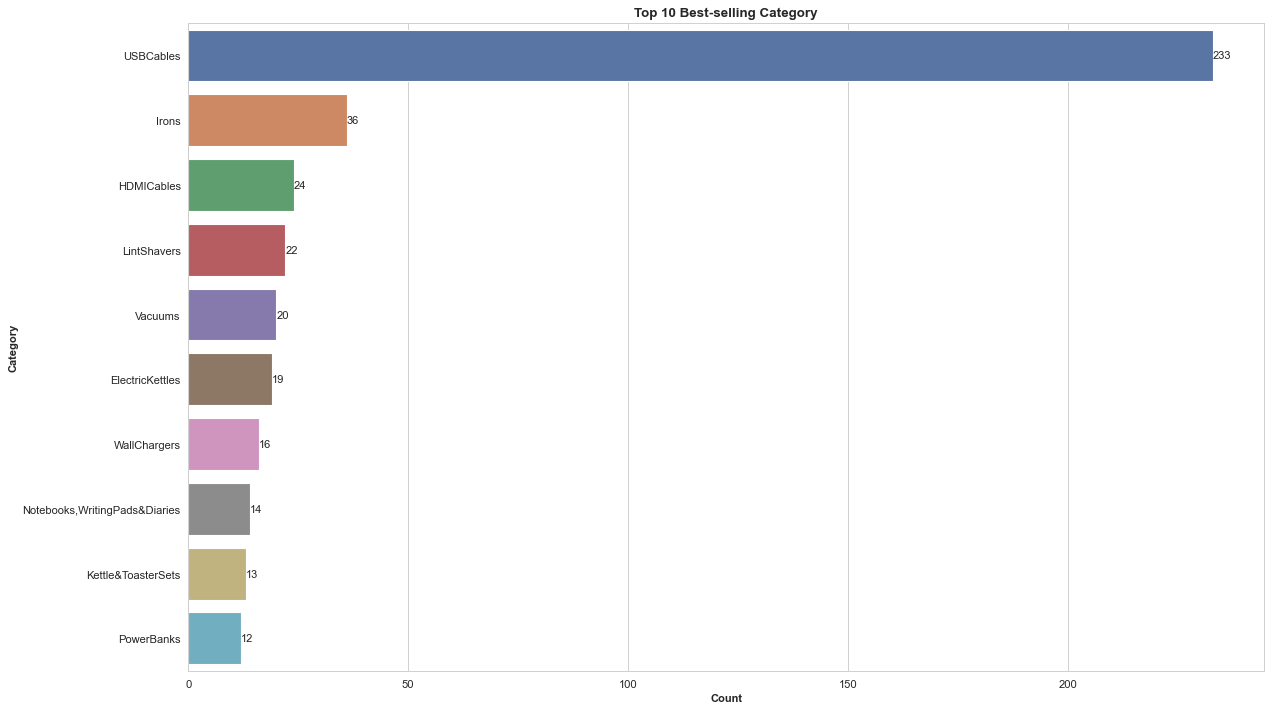

Index(['Category', 'counts'], dtype='object')


In [166]:
#Most amount of products by category

most_main_items = newdf['Category'].value_counts().head(10).rename_axis('Category').reset_index(name='counts')

#most_sub_items = newdf['Main_category'].value_counts().head(10).rename_axis('Main_category').reset_index(name='counts')

fig, ax = plt.subplots(1, 1, figsize=(16, 9),dpi=80)
#fig.suptitle('Most Amount of Products by Category', fontweight='heavy', size='x-large')

#sns.barplot(ax=ax, data=most_main_items, x='counts', y='Root_Category')
sns.barplot(ax=ax, data=most_main_items, x='counts', y='Category')

plt.subplots_adjust(hspace = 0.3)

# ax.set_xlabel('Count', fontweight='bold')
# ax.set_ylabel('Root Category', fontweight='bold')

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Category', fontweight='bold')

#ax.set_title('Top 5 Best-selling Root-Category', fontweight='bold')
ax.set_title('Top 10 Best-selling Category', fontweight='bold')


ax.bar_label(ax.containers[0])
#ax[1].bar_label(ax[1].containers[0])
# mplppt.savefig('first bar plot.pptx')
plt.tight_layout()
plt.savefig('Best-selling Category.png')
plt.show()
print(most_main_items.columns)
# print(ax[0].containers[0])

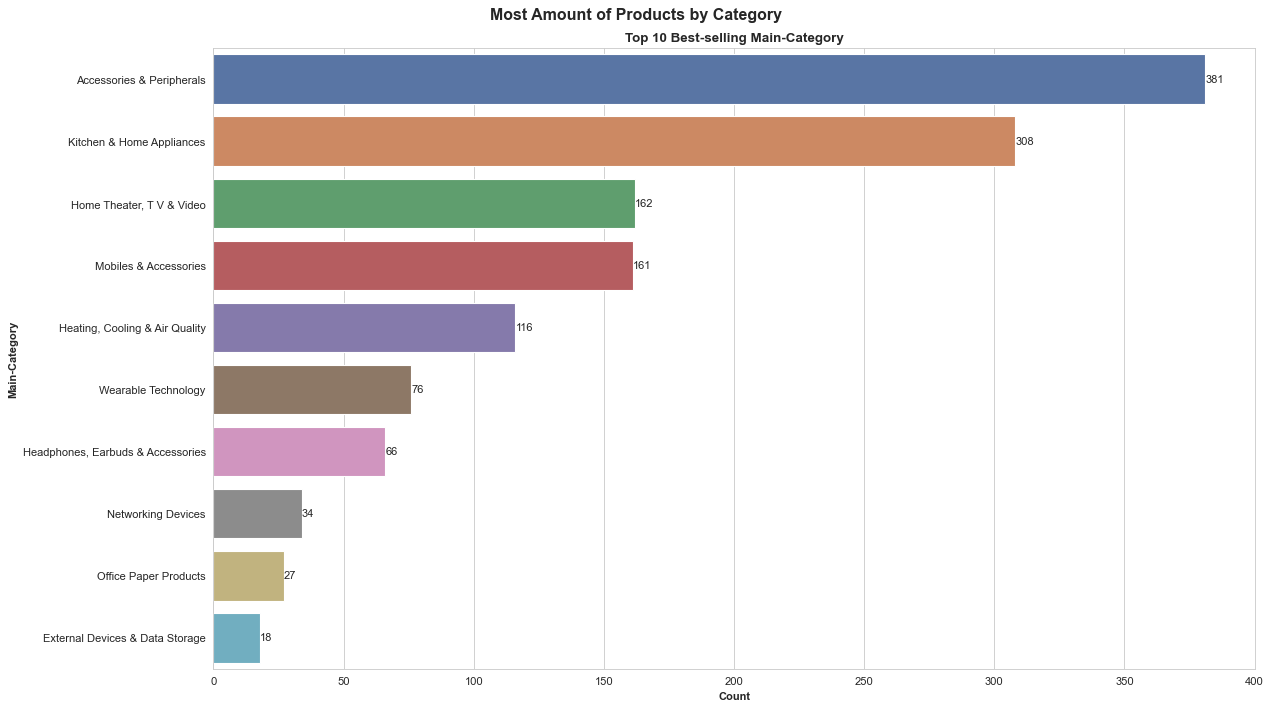

Index(['Root_Category', 'counts'], dtype='object')


In [154]:
#Most amount of products by category

most_main_items = newdf['Root_Category'].value_counts().head(5).rename_axis('Root_Category').reset_index(name='counts')

most_sub_items = newdf['Main_category'].value_counts().head(10).rename_axis('Main_category').reset_index(name='counts')

fig, ax = plt.subplots(1, 1, figsize=(16, 9),dpi=80)
fig.suptitle('Most Amount of Products by Category', fontweight='heavy', size='x-large')

#sns.barplot(ax=ax, data=most_main_items, x='counts', y='Root_Category')
sns.barplot(ax=ax, data=most_sub_items, x='counts', y='Main_category')

plt.subplots_adjust(hspace = 0.3)

# ax.set_xlabel('Count', fontweight='bold')
# ax.set_ylabel('Root Category', fontweight='bold')

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Main-Category', fontweight='bold')

#ax.set_title('Top 5 Best-selling Root-Category', fontweight='bold')
ax.set_title('Top 10 Best-selling Main-Category', fontweight='bold')


ax.bar_label(ax.containers[0])
#ax[1].bar_label(ax[1].containers[0])
# mplppt.savefig('first bar plot.pptx')
plt.tight_layout()
plt.savefig('Best-selling Main Category.png')
plt.show()
print(most_main_items.columns)
# print(ax[0].containers[0])

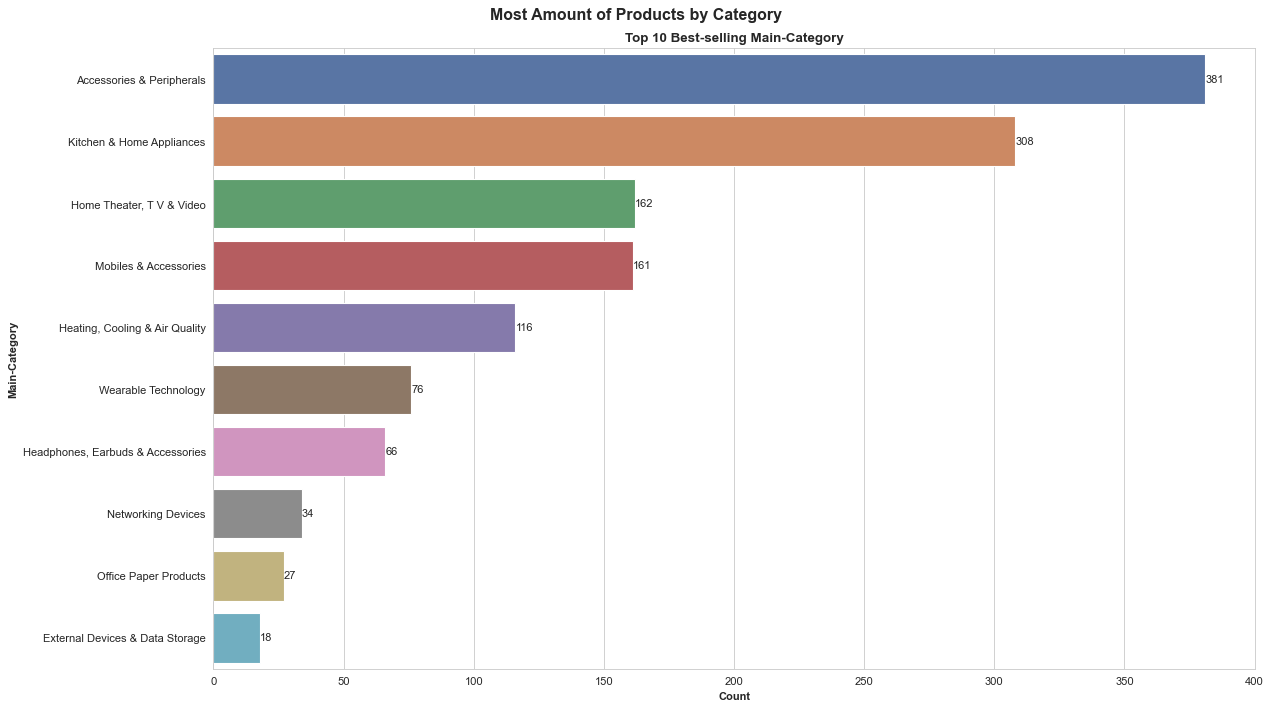

Index(['Root_Category', 'counts'], dtype='object')


In [154]:
#Most amount of products by category

most_main_items = newdf['Root_Category'].value_counts().head(5).rename_axis('Root_Category').reset_index(name='counts')

most_sub_items = newdf['Main_category'].value_counts().head(10).rename_axis('Main_category').reset_index(name='counts')

fig, ax = plt.subplots(1, 1, figsize=(16, 9),dpi=80)
fig.suptitle('Most Amount of Products by Category', fontweight='heavy', size='x-large')

#sns.barplot(ax=ax, data=most_main_items, x='counts', y='Root_Category')
sns.barplot(ax=ax, data=most_sub_items, x='counts', y='Main_category')

plt.subplots_adjust(hspace = 0.3)

# ax.set_xlabel('Count', fontweight='bold')
# ax.set_ylabel('Root Category', fontweight='bold')

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Main-Category', fontweight='bold')

#ax.set_title('Top 5 Best-selling Root-Category', fontweight='bold')
ax.set_title('Top 10 Best-selling Main-Category', fontweight='bold')


ax.bar_label(ax.containers[0])
#ax[1].bar_label(ax[1].containers[0])
# mplppt.savefig('first bar plot.pptx')
plt.tight_layout()
plt.savefig('Best-selling Main Category.png')
plt.show()
print(most_main_items.columns)
# print(ax[0].containers[0])

In [155]:
category=newdf[['Root_Category','Main_category','Sub_category','Subsubcategory','Category','user_id']]
category
category['category_count']=category.groupby(['Root_Category','Main_category'])[['user_id']].transform('count')
categorydf=category[['Root_Category','Main_category','category_count']].drop_duplicates(['Root_Category','Main_category','category_count'],keep='last').sort_values(['Root_Category','category_count'],ascending=False)
most_common_category=categorydf.sort_values(['Root_Category','category_count'],ascending=(True,False)).groupby('Root_Category').head(5).reset_index(drop=True)

<ipython-input-155-d0994339dec6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [156]:
Rootcategory_lst=list(newdf.Root_Category.unique())

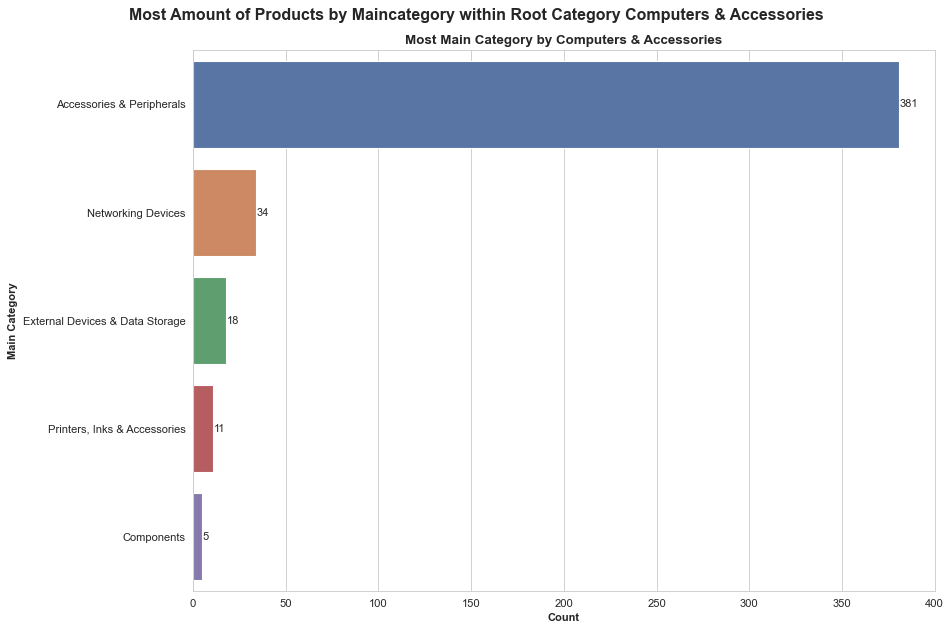

In [160]:
df=most_common_category[most_common_category.Root_Category==Rootcategory_lst[0]]
fig, ax = plt.subplots(1,1,figsize=(12,8),dpi=80)
    
fig.suptitle(f'Most Amount of Products by Maincategory within Root Category {Rootcategory_lst[0]}', fontweight='heavy', size='x-large')

sns.barplot(ax=ax, data=df, x='category_count', y='Main_category')

plt.subplots_adjust(hspace = 0.3)

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Main Category', fontweight='bold')



ax.set_title(f'Most Main Category by {Rootcategory_lst[0]}', fontweight='bold')


ax.bar_label(ax.containers[0])
# plt.savefig(f'../image/{Rootcategory_lst[0]}_barchart.png')
plt.tight_layout()
plt.savefig(f'Best-selling Main Category within {Rootcategory_lst[0]}.png')
plt.show()
   


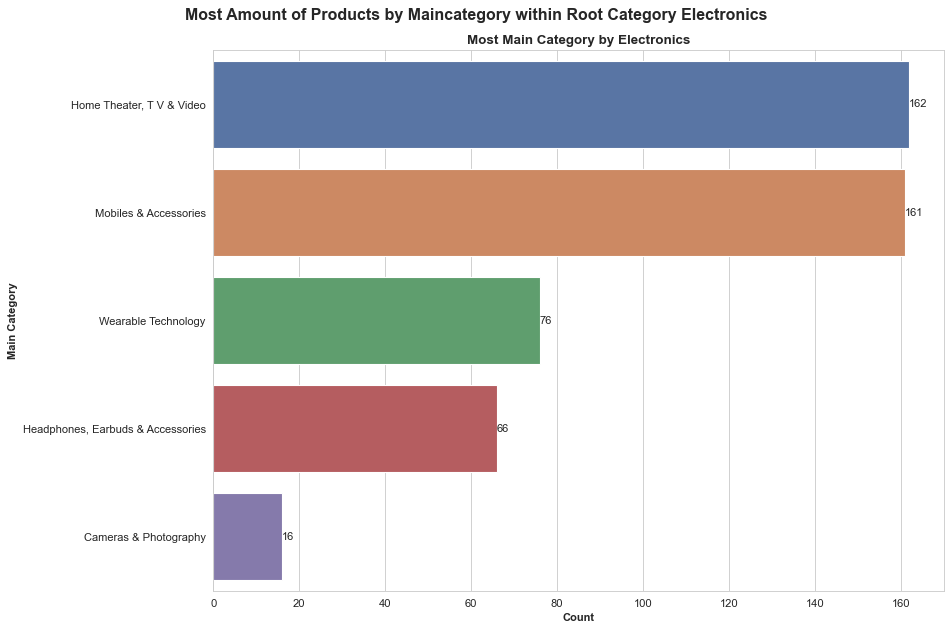

In [159]:
df=most_common_category[most_common_category.Root_Category==Rootcategory_lst[1]]
fig, ax = plt.subplots(1,1,figsize=(12,8),dpi=80)
    
fig.suptitle(f'Most Amount of Products by Maincategory within Root Category {Rootcategory_lst[1]}', fontweight='heavy', size='x-large')

sns.barplot(ax=ax, data=df, x='category_count', y='Main_category')

plt.subplots_adjust(hspace = 0.3)

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Main Category', fontweight='bold')



ax.set_title(f'Most Main Category by {Rootcategory_lst[1]}', fontweight='bold')


ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig(f'Best-selling Main Category within {Rootcategory_lst[1]}.png')
plt.show()

[Text(0, 0, '2')]

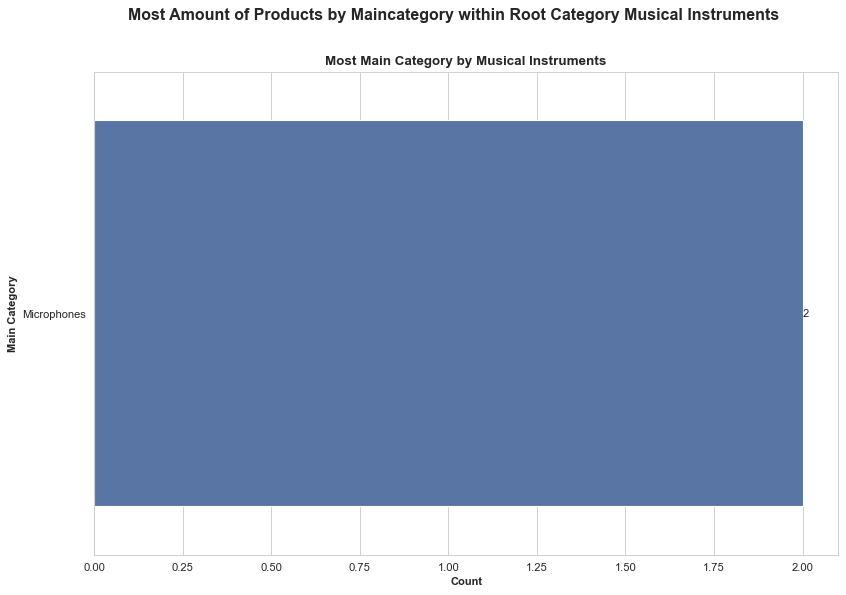

In [82]:
df=most_common_category[most_common_category.Root_Category==Rootcategory_lst[2]]
fig, ax = plt.subplots(1,1,figsize=(12,8),dpi=80)
    
fig.suptitle(f'Most Amount of Products by Maincategory within Root Category {Rootcategory_lst[2]}', fontweight='heavy', size='x-large')

sns.barplot(ax=ax, data=df, x='category_count', y='Main_category')

plt.subplots_adjust(hspace = 0.3)

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Main Category', fontweight='bold')



ax.set_title(f'Most Main Category by {Rootcategory_lst[2]}', fontweight='bold')


ax.bar_label(ax.containers[0])

[Text(0, 0, '27'), Text(0, 0, '4')]

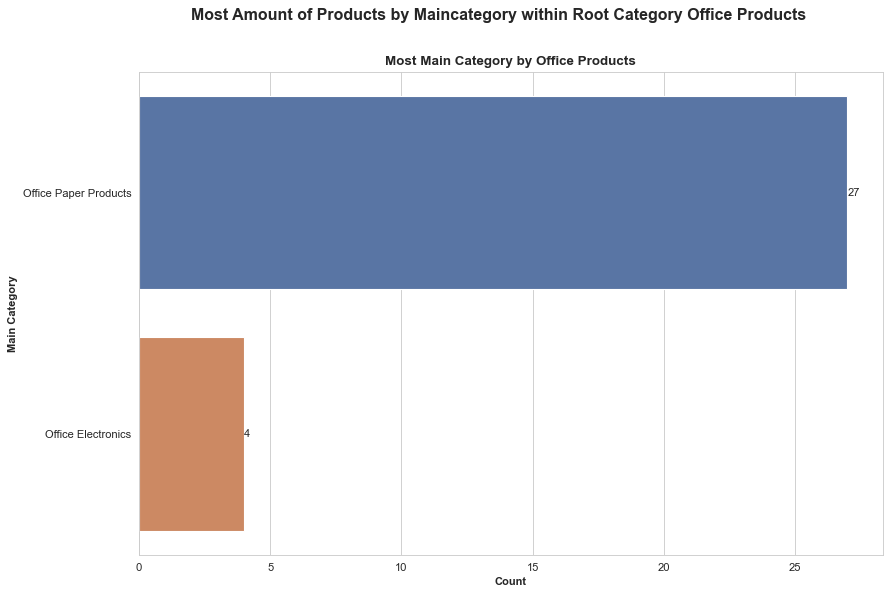

In [83]:
df=most_common_category[most_common_category.Root_Category==Rootcategory_lst[3]]
fig, ax = plt.subplots(1,1,figsize=(12,8),dpi=80)
    
fig.suptitle(f'Most Amount of Products by Maincategory within Root Category {Rootcategory_lst[3]}', fontweight='heavy', size='x-large')

sns.barplot(ax=ax, data=df, x='category_count', y='Main_category')

plt.subplots_adjust(hspace = 0.3)

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Main Category', fontweight='bold')



ax.set_title(f'Most Main Category by {Rootcategory_lst[3]}', fontweight='bold')


ax.bar_label(ax.containers[0])

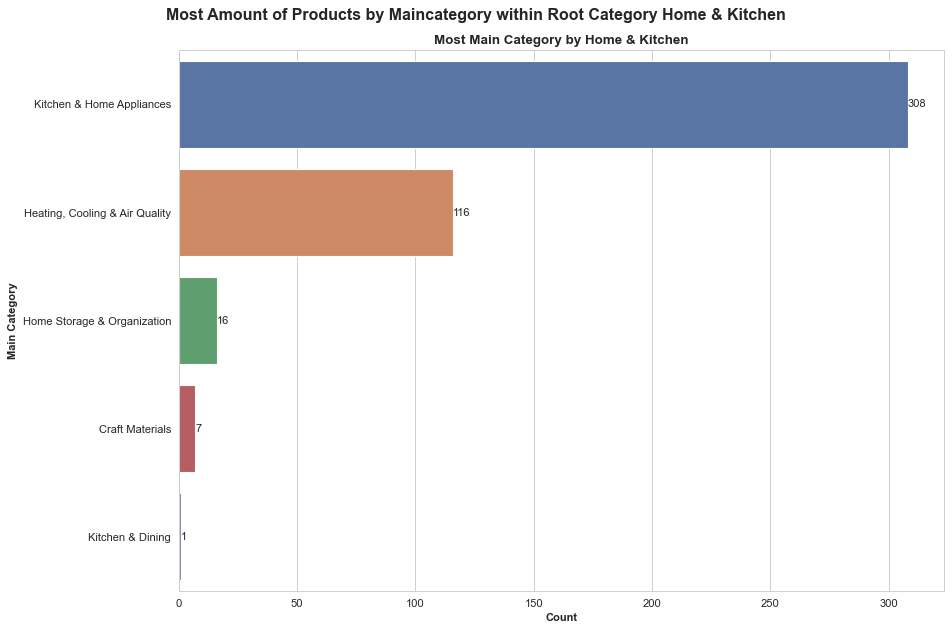

In [161]:
df=most_common_category[most_common_category.Root_Category==Rootcategory_lst[4]]
fig, ax = plt.subplots(1,1,figsize=(12,8),dpi=80)
    
fig.suptitle(f'Most Amount of Products by Maincategory within Root Category {Rootcategory_lst[4]}', fontweight='heavy', size='x-large')

sns.barplot(ax=ax, data=df, x='category_count', y='Main_category')

plt.subplots_adjust(hspace = 0.3)

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Main Category', fontweight='bold')



ax.set_title(f'Most Main Category by {Rootcategory_lst[4]}', fontweight='bold')


ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.savefig(f'Best-selling Main Category within {Rootcategory_lst[4]}.png')
plt.show()


[Text(0, 0, '2')]

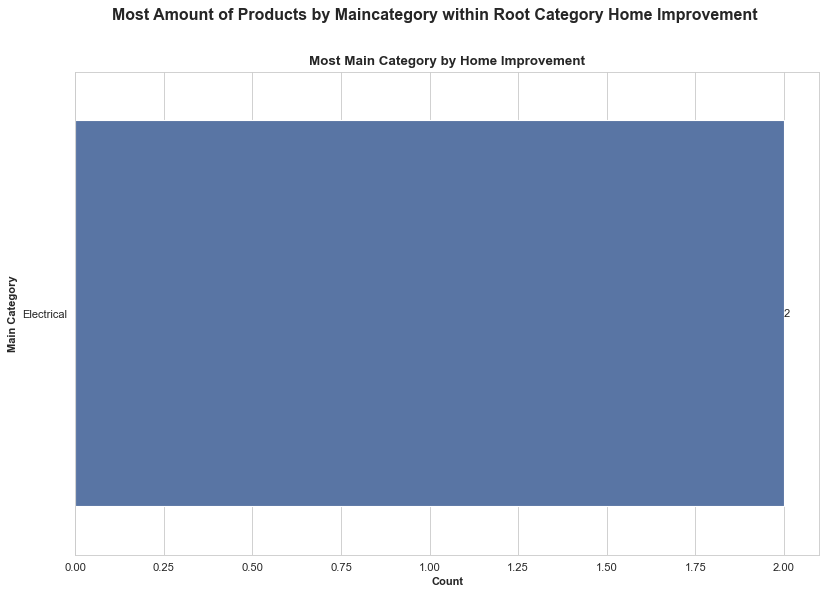

In [85]:
df=most_common_category[most_common_category.Root_Category==Rootcategory_lst[5]]
fig, ax = plt.subplots(1,1,figsize=(12,8),dpi=80)
    
fig.suptitle(f'Most Amount of Products by Maincategory within Root Category {Rootcategory_lst[5]}', fontweight='heavy', size='x-large')

sns.barplot(ax=ax, data=df, x='category_count', y='Main_category')

plt.subplots_adjust(hspace = 0.3)

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Main Category', fontweight='bold')



ax.set_title(f'Most Main Category by {Rootcategory_lst[5]}', fontweight='bold')


ax.bar_label(ax.containers[0])

[Text(0, 0, '1')]

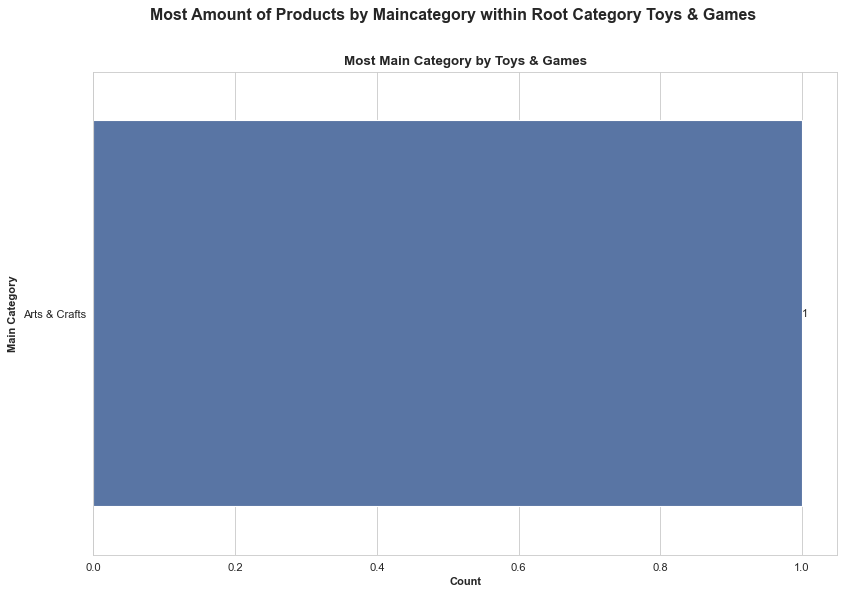

In [86]:
df=most_common_category[most_common_category.Root_Category==Rootcategory_lst[6]]
fig, ax = plt.subplots(1,1,figsize=(12,8),dpi=80)
    
fig.suptitle(f'Most Amount of Products by Maincategory within Root Category {Rootcategory_lst[6]}', fontweight='heavy', size='x-large')

sns.barplot(ax=ax, data=df, x='category_count', y='Main_category')

plt.subplots_adjust(hspace = 0.3)

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Main Category', fontweight='bold')



ax.set_title(f'Most Main Category by {Rootcategory_lst[6]}', fontweight='bold')


ax.bar_label(ax.containers[0])

[Text(0, 0, '1')]

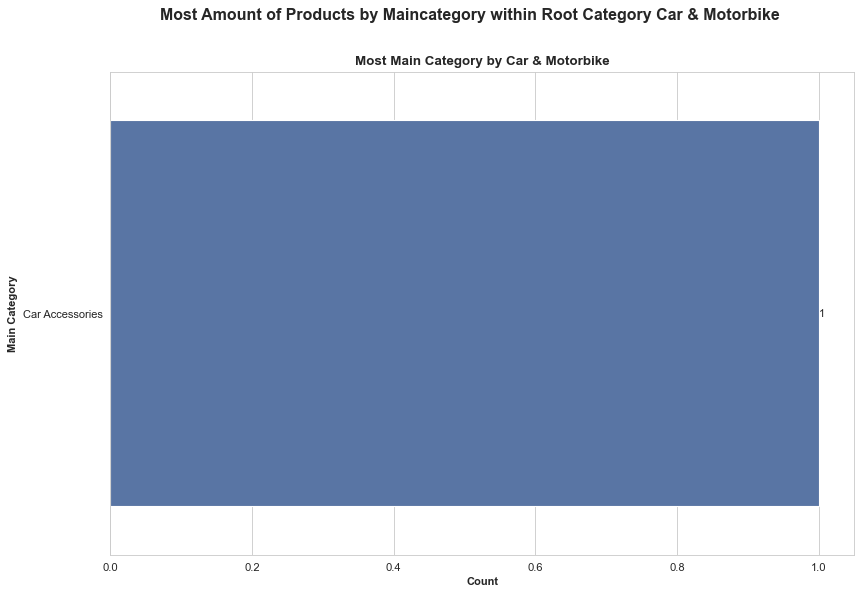

In [87]:
df=most_common_category[most_common_category.Root_Category==Rootcategory_lst[7]]
fig, ax = plt.subplots(1,1,figsize=(12,8),dpi=80)
    
fig.suptitle(f'Most Amount of Products by Maincategory within Root Category {Rootcategory_lst[7]}', fontweight='heavy', size='x-large')

sns.barplot(ax=ax, data=df, x='category_count', y='Main_category')

plt.subplots_adjust(hspace = 0.3)

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Main Category', fontweight='bold')



ax.set_title(f'Most Main Category by {Rootcategory_lst[7]}', fontweight='bold')


ax.bar_label(ax.containers[0])

[Text(0, 0, '1')]

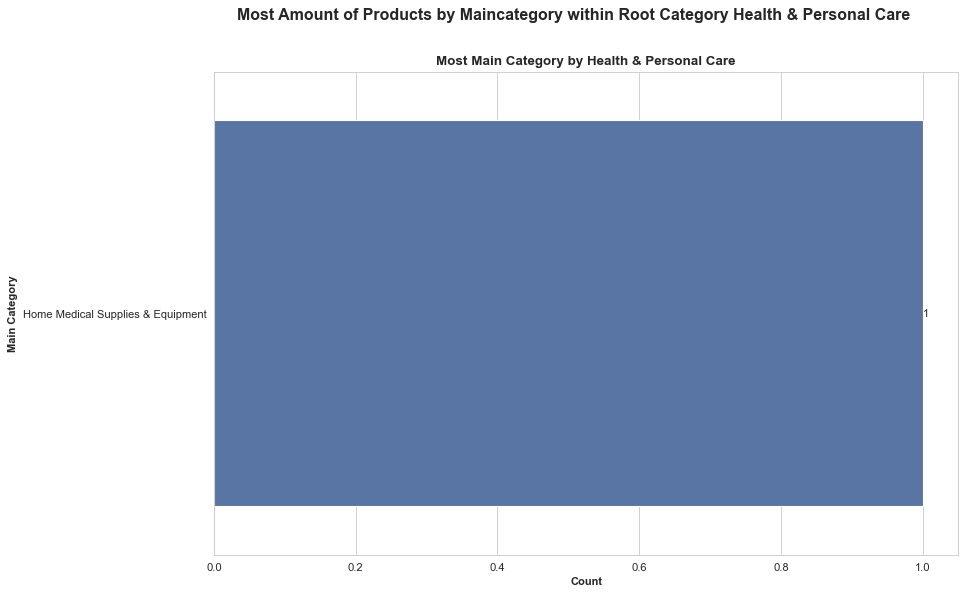

In [88]:
df=most_common_category[most_common_category.Root_Category==Rootcategory_lst[8]]
fig, ax = plt.subplots(1,1,figsize=(12,8),dpi=80)
    
fig.suptitle(f'Most Amount of Products by Maincategory within Root Category {Rootcategory_lst[8]}', fontweight='heavy', size='x-large')

sns.barplot(ax=ax, data=df, x='category_count', y='Main_category')

plt.subplots_adjust(hspace = 0.3)

ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Main Category', fontweight='bold')



ax.set_title(f'Most Main Category by {Rootcategory_lst[8]}', fontweight='bold')


ax.bar_label(ax.containers[0])

In [89]:
newdf['item_count'] = newdf.groupby(['Root_Category', 'Main_category'])[['user_id']].transform('count')

In [90]:
newdf.groupby(['Root_Category',])['Main_category'].size().reset_index(name='counts')


,Root_Category,counts
0,Car & Motorbike,1
1,Computers & Accessories,453
2,Electronics,526
3,Health & Personal Care,1
4,Home & Kitchen,448
5,Home Improvement,2
6,Musical Instruments,2
7,Office Products,31
8,Toys & Games,1


In [91]:
newdf[newdf['Root_Category']==list(newdf.Root_Category.unique())[0]].sort_values('discount_percentage',ascending=False)[['discount_percentage','Root_Category','Main_category','Sub_category','Subsubcategory','Category']].iloc[:10]

,discount_percentage,Root_Category,Main_category,Sub_category,Subsubcategory,Category
695,0.94,Computers & Accessories,Accessories & Peripherals,Adapters,USBtoUSBAdapters,None
407,0.90,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,CableConnectionProtectors,None
644,0.90,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,CableConnectionProtectors,None
602,0.90,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,CableConnectionProtectors,None
2,0.90,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,Cables,USBCables
246,0.89,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,Cables,USBCables
285,0.88,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,Cables,USBCables
870,0.88,Computers & Accessories,Accessories & Peripherals,"Keyboards,Mice&InputDevices",Keyboard&MiceAccessories,DustCovers
109,0.88,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,Cables,USBCables
248,0.87,Computers & Accessories,Accessories & Peripherals,Cables&Accessories,Cables,USBCables


In [92]:
newdf[newdf['Root_Category']==list(newdf.Root_Category.unique())[1]].sort_values('discount_percentage',ascending=False)[['discount_percentage','Root_Category','Main_category','Sub_category','Subsubcategory','Category']].iloc[:10]

,discount_percentage,Root_Category,Main_category,Sub_category,Subsubcategory,Category
334,0.91,Electronics,Wearable Technology,SmartWatches,None,None
380,0.91,Electronics,Wearable Technology,SmartWatches,None,None
364,0.91,Electronics,Wearable Technology,SmartWatches,None,None
372,0.91,Electronics,Wearable Technology,SmartWatches,None,None
368,0.91,Electronics,Wearable Technology,SmartWatches,None,None
557,0.90,Electronics,Mobiles & Accessories,MobileAccessories,Décor,PhoneCharms
920,0.90,Electronics,"Headphones, Earbuds & Accessories",Earpads,None,None
542,0.90,Electronics,Mobiles & Accessories,MobileAccessories,Cases&Covers,BasicCases
552,0.88,Electronics,"Headphones, Earbuds & Accessories",Adapters,None,None
227,0.88,Electronics,"Home Theater, T V & Video",Accessories,Cables,HDMICables


In [93]:
newdf[newdf['Root_Category']==list(newdf.Root_Category.unique())[2]].sort_values('discount_percentage',ascending=False)[['discount_percentage','Root_Category','Main_category','Sub_category','Subsubcategory','Category']].iloc[:10]

,discount_percentage,Root_Category,Main_category,Sub_category,Subsubcategory,Category
613,0.60,Musical Instruments,Microphones,Condenser,None,None
800,0.32,Musical Instruments,Microphones,Condenser,None,None


In [94]:
newdf['discount_percentage'].describe()


count    1465.000000
mean        0.476915
std         0.216359
min         0.000000
25%         0.320000
50%         0.500000
75%         0.630000
max         0.940000
Name: discount_percentage, dtype: float64

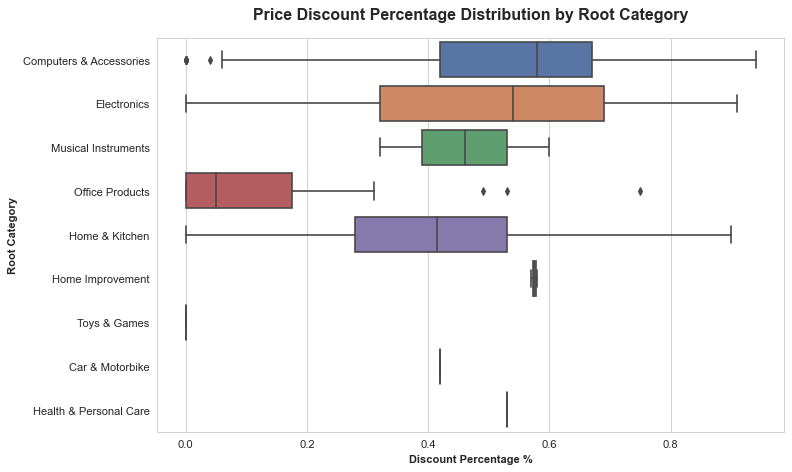

In [168]:
fig, ax=plt.subplots(figsize=(10,6),dpi=80)
sns.boxplot(data=newdf, x='discount_percentage', y='Root_Category')
ax.set_xlabel('Discount Percentage %', fontweight='bold')
ax.set_ylabel('Root Category', fontweight='bold')
ax.set_title('Price Discount Percentage Distribution by Root Category', fontweight='heavy', size='x-large', y=1.03)
plt.tight_layout()
plt.savefig('Boxplot of Price Discount Percentage png')
plt.show()

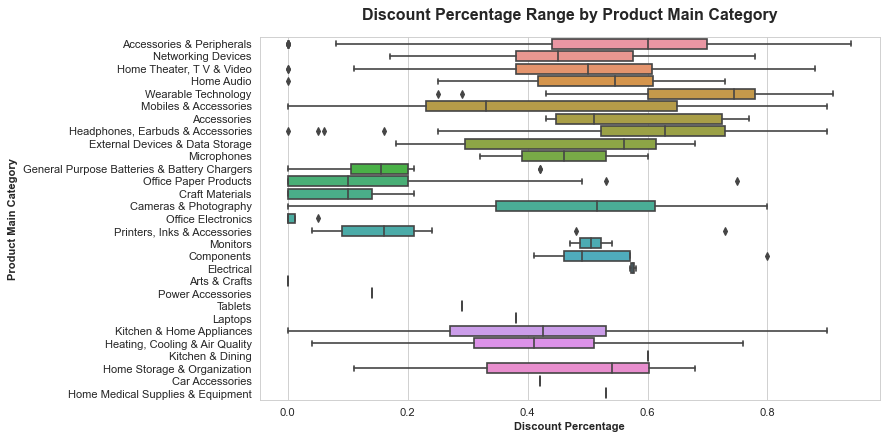

In [96]:
# The Discount Range by Product Main Category

fig, ax = plt.subplots(figsize=(10, 6),dpi=80)

sns.boxplot(data=newdf, x='discount_percentage', y='Main_category')

ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Discount Percentage Range by Product Main Category', fontweight='heavy', size='x-large', y=1.03)


plt.show()

<Axes: xlabel='actual_price', ylabel='discounted_price'>

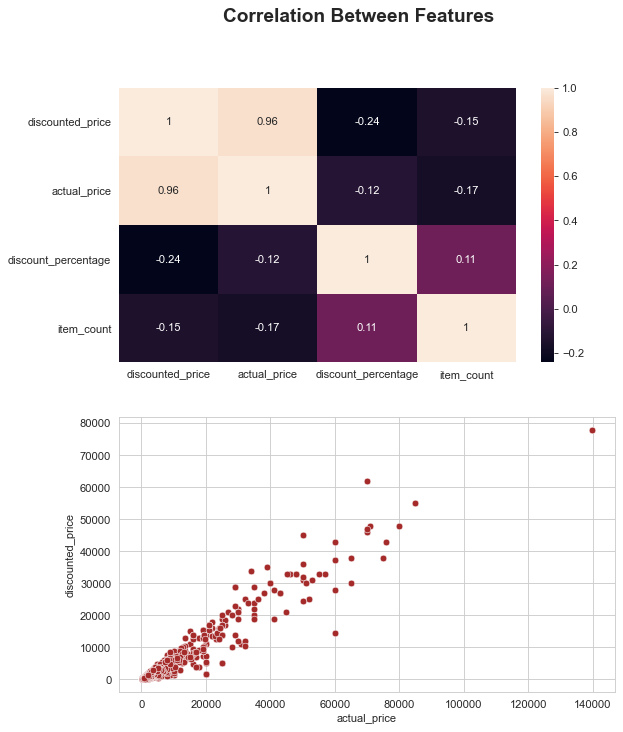

In [97]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10),dpi=80)

fig.suptitle('Correlation Between Features', fontweight='heavy', size='xx-large')

sns.heatmap(ax=ax[0], data=newdf.corr(),annot=True)
sns.scatterplot(ax=ax[1], data=newdf, y='discounted_price', x='actual_price', color='brown')


In [98]:
fig = px.imshow(newdf[['actual_price','discounted_price','discount_percentage']].corr(),text_auto=True,title="Correlation Heatmap")
fig.show()
fig.write_image("images/fig1.png")

In [99]:
fig = px.imshow(newdf[newdf.Root_Category==list(newdf.Root_Category.unique())[0]][['actual_price','discounted_price','discount_percentage']].corr(),text_auto=True,title=f"Correlation Heatmap for {list(newdf.Root_Category.unique())[0]}")
fig.show()
fig.write_image("images/fig2.png")

In [100]:
fig = px.imshow(newdf[newdf.Root_Category==list(newdf.Root_Category.unique())[1]][['actual_price','discounted_price','discount_percentage']].corr(),text_auto=True,title=f"Correlation Heatmap for {list(newdf.Root_Category.unique())[1]}")
fig.show()
fig.write_image("images/fig3.png")

In [101]:
fig = px.imshow(newdf[newdf.Root_Category==list(newdf.Root_Category.unique())[3]][['actual_price','discounted_price','discount_percentage']].corr(),text_auto=True,title=f"Correlation Heatmap for {list(newdf.Root_Category.unique())[3]}")
fig.show()
fig.write_image("images/fig4.png")

In [102]:
fig = px.imshow(newdf[newdf.Root_Category==list(newdf.Root_Category.unique())[4]][['actual_price','discounted_price','discount_percentage']].corr(),text_auto=True,title=f"Correlation Heatmap for {list(newdf.Root_Category.unique())[4]}")
fig.show()
fig.write_image("images/fig5.png")

In [103]:
fig = px.imshow(newdf[newdf.Root_Category==list(newdf.Root_Category.unique())[5]][['actual_price','discounted_price','discount_percentage']].corr(),text_auto=True,title=f"Correlation Heatmap for {list(newdf.Root_Category.unique())[5]}")
fig.show()
fig.write_image("images/fig6.png")

In [176]:
fig = px.histogram(newdf, x="Root_Category", y="discount_percentage", histfunc="count",color="Root_Category",text_auto=True,title="Barplot of Discounted Percentage by Root Category")
fig.show()
fig.write_image("images/fig7.png")

In [177]:
fig = px.histogram(newdf, x="Root_Category", y="discount_percentage", histfunc="avg",color="Root_Category",text_auto=True,title='Average Discount Percentage by Root Category')
fig.write_image("images/fig6.png")
fig.show()

<ipython-input-106-ff1bbd3ac39a>:14: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



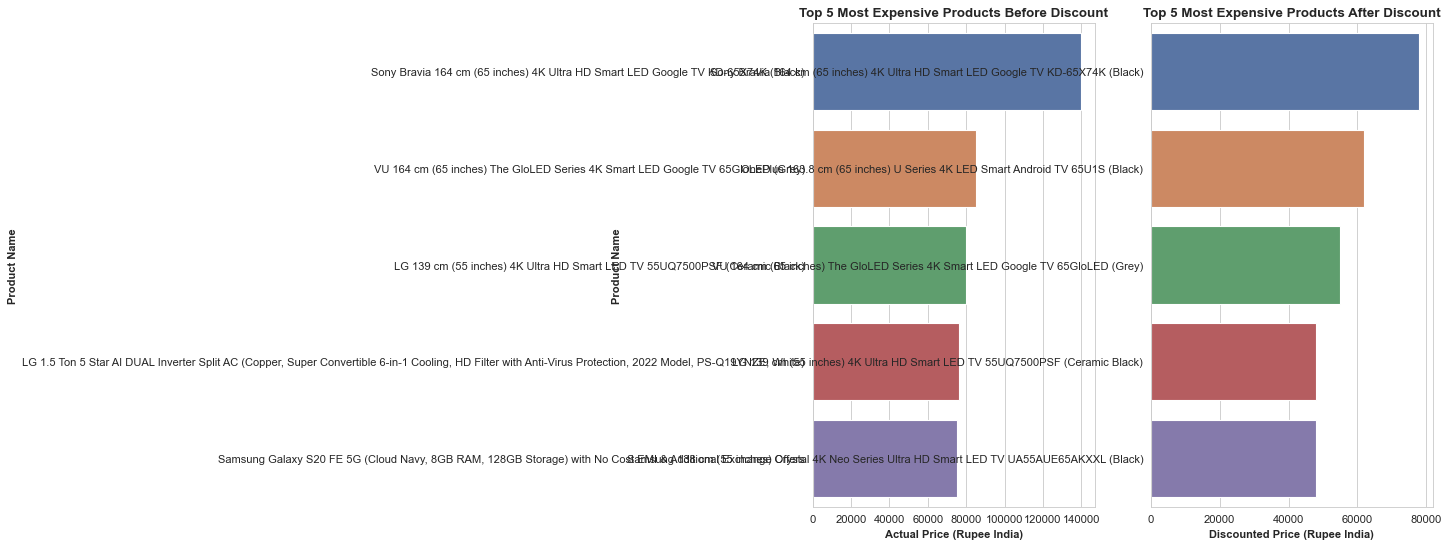

In [106]:
#Top 5 Most Expensive Products After Discount
fig, ax = plt.subplots(1,2,figsize=(10.0, 8.0),dpi=80)


sns.barplot(ax=ax[0],data=newdf.sort_values('actual_price', ascending=False).head(5), x='actual_price', y='product_name')
sns.barplot(ax=ax[1],data=newdf.sort_values('discounted_price',ascending=False).head(5),x='discounted_price',y='product_name')

ax[0].set_title('Top 5 Most Expensive Products Before Discount', fontweight='bold')
ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[0].set_ylabel('Product Name', fontweight='bold')
ax[1].set_title('Top 5 Most Expensive Products After Discount', fontweight='bold')
ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Product Name', fontweight='bold')
plt.tight_layout()
plt.show()

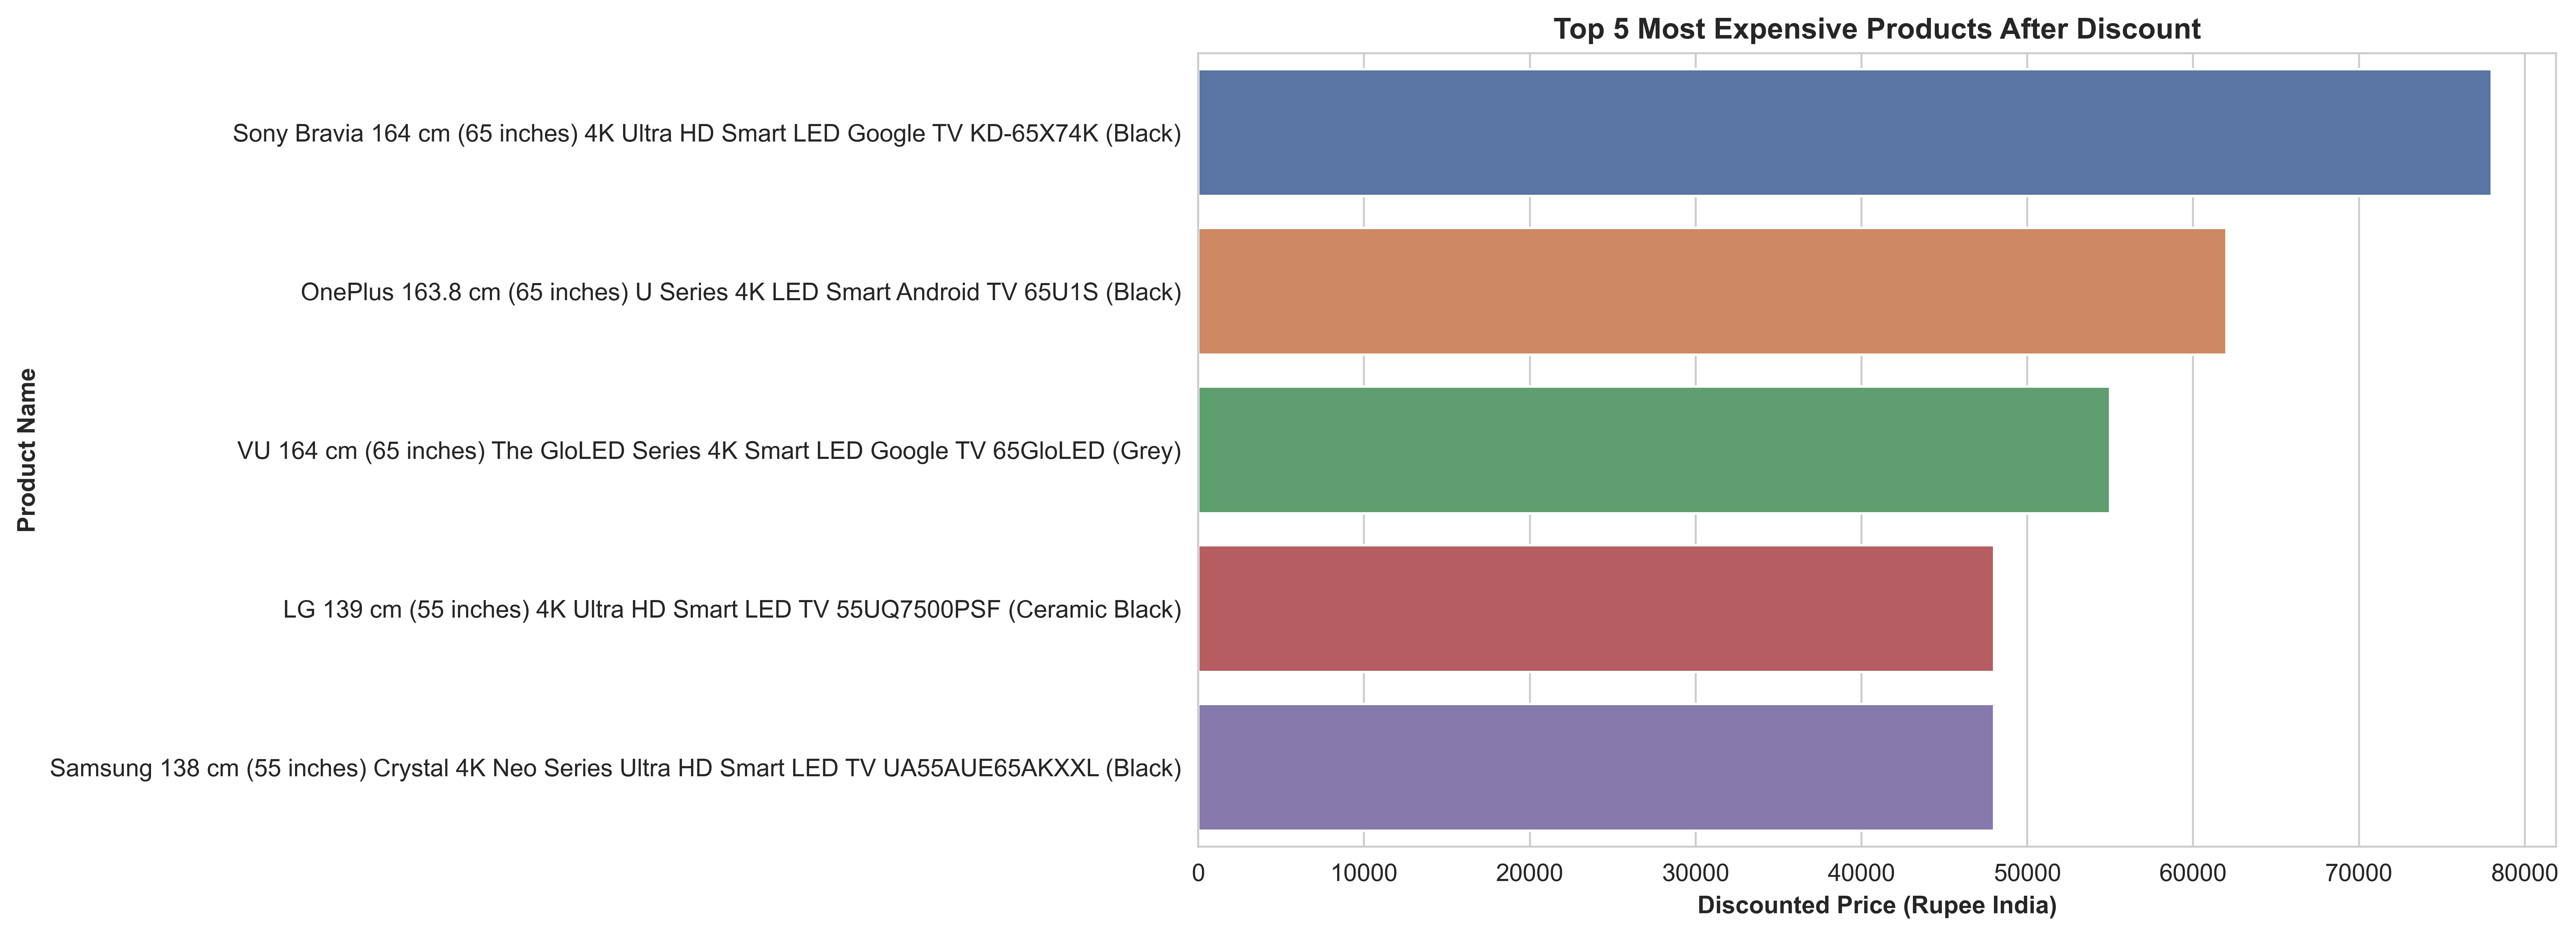

In [107]:
fig,ax=plt.subplots(figsize=(10,6),dpi=500)
sns.barplot(data=newdf.sort_values('discounted_price',ascending=False).head(5),x='discounted_price',y='product_name')
ax.set_title('Top 5 Most Expensive Products After Discount', fontweight='bold')
ax.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax.set_ylabel('Product Name', fontweight='bold')
plt.show()

In [108]:
x = newdf.actual_price.tolist()
y = newdf.discounted_price.tolist()
x = sm.add_constant(x)


In [109]:
mod = sm.OLS(y,x)    # Describe model

In [110]:
res=mod.fit()

In [111]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.812e+04
Date:                Thu, 06 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:57:31   Log-Likelihood:                -13137.
No. Observations:                1465   AIC:                         2.628e+04
Df Residuals:                    1463   BIC:                         2.629e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -219.2597     55.486     -3.952      0.0

In [112]:
print(res.rsquared)

0.9252810058744189


In [113]:
res.params

array([-219.2596552 ,    0.61424725])

In [114]:
res.fittedvalues

array([ 455.7980736 ,   -4.88736462,  947.19587437, ..., 1672.62187775,
        941.66764911, 2047.31270083])

In [217]:
newdf['Brand']=newdf.product_name.str.split(' ',expand=True).iloc[:,0]

In [218]:
dfUSB=newdf[newdf.Category=='USBCables'].reset_index(drop=True)

In [219]:
USB_product=newdf[newdf.Category=='USBCables']['about_product'].apply(str)
# re.findall(r'(?i)\bIPONE\b', wordy_tom)

In [220]:
def apple(feature):
    return len(re.findall(r'\b(?i:iphone|iPad Pro|iPad Air|iPad mini|iPod|Macbook)\b',feature))>0

In [221]:
def android(feature):
    return len(re.findall(r'\b(?i:android|Google|Samsung)\b',feature))>0

In [222]:
def nylon(feature):
    return len(re.findall(r'(?i)\bnylon\b',feature))>0

In [223]:
def PVC(feature):
    return len(re.findall(r'(?i)\bPVC\b',feature))>0

In [224]:
def TPE(feature):
    return len(re.findall(r'(?i)\bTPE\b',feature))>0

In [225]:
def USBlength(feature):
    match=re.findall(r'\b(\d+(\.\d+)?)(\s*(meter|meters))\b',feature)
    if match:
        return float(match[0][0])
    return 0

In [226]:
def warranty(feature):
    return len(re.findall(r'(?i)\bwarranty\b',feature))>0

In [227]:
def fc(feature):
    return len(re.findall(r'\b(?i:Fast Charge|fast charging|Quick Charging|Fast Charger)\b',feature))>0

In [228]:
##cross check Type C compatible with apple products;
# cross check watt info

In [229]:
USB_product=newdf[newdf.Category=='USBCables']['about_product'].apply(str)
# re.findall(r'(?i)\bIPONE\b', wordy_tom)

In [230]:
def transfer_speed(feature):
    match=re.search(r'\b(\d+(\.\d+)?)(\s*(M|G)bps)\b',feature)
    if match:
        return feature[match.start():match.end()+1].replace("|","")
    return 0

In [231]:
def warranty_detail(feature):
    match=re.findall(r'\b(\d{1,2}?)(\s*months|Months|year|Year|years|Years)(\s*warranty|Warranty)\b',feature)
    if match:
        return int(match[0][0])
    return 0       

In [295]:
dfUSB['warranty_detail']=pd.Series(list(map(warranty_detail,dfUSB.about_product.apply(str))),index=dfUSB.index)

In [233]:
dfUSB['length']=pd.Series(list(map(USBlength,dfUSB.about_product.apply(str))),index=dfUSB.index)

In [234]:
fig = px.histogram(dfUSB[dfUSB.length!=0], x="Brand", y="length", histfunc="count",color="Brand",text_auto=True).update_xaxes(categoryorder="total descending")
fig.update_layout(title_text='USB length by Brand')
fig.show()

In [235]:
df=dfUSB[dfUSB.length!=0]
fig = px.violin(df,y="length",box=True,points='all')
fig.update_layout(title_text='Distribution of USB length')
fig.show()

In [236]:
import plotly.express as px

# Create a histogram
fig = px.histogram(dfUSB[dfUSB.length!=0], x="length",
                  title="Distribution of USB length")
fig.show()

In [237]:
fig = px.box(dfUSB.sort_values('length',ascending=False), x="Brand", y="length", color="Brand")
fig.update_layout(title_text='USB length by Brand')
fig.show()

In [296]:
fig = px.histogram(dfUSB[dfUSB.warranty_detail!=0], x="Brand", y="warranty_detail", histfunc="count",color="Brand",text_auto=True,title="Warranty (in Months) by Brands")
fig.write_image("images/Warranty details.png")
fig.show()

In [239]:
def ts_number(feature):
    match=re.findall(r'\b(\d+(\.\d+)?)(\s*(G|M)bps)\b',feature)
    if match:
        if  match[0][3]=='G':
            return float(match[0][0])*1000
        return float(match[0][0])
        
    return 0
    

In [240]:
def ts_feature(feature):
    return re.findall(r'\b(\d+(\.\d+)?)(\s*(G|M)bps)\b',feature)

In [241]:
dfUSB['transfer_speed']=pd.Series(list(map(ts_number,dfUSB.about_product.apply(str))),index=dfUSB.index)

In [242]:
dfUSB['apple_compatibility']=pd.Series(list(map(apple,dfUSB['about_product'].apply(str))),index=dfUSB.index)

In [243]:
dfUSB['android_compatibility']=pd.Series(list(map(android,dfUSB['about_product'].apply(str))),index=dfUSB.index)

In [244]:
dfUSB[(dfUSB.apple_compatibility==True)&(dfUSB.android_compatibility==True)].shape[0]

23

In [245]:
dfUSB[~(dfUSB.apple_compatibility==True)& ~(dfUSB.android_compatibility==True)].shape[0]

111

In [246]:
apple_compatible=dfUSB[dfUSB.apple_compatibility==True].shape[0]

In [247]:
android_compatible=dfUSB[dfUSB.android_compatibility==True].shape[0]

In [248]:
overlapp=dfUSB[(dfUSB.apple_compatibility==True)&(dfUSB.android_compatibility==True)].shape[0]

In [ ]:
def warranty(feature):
    return len(re.findall(r'(?i)\bwarranty\b',feature))>0

In [281]:
def typec(feature):
    match=re.findall(r'(?i)\bType(\s*C)\b',feature)
    return len(match)>0

In [283]:
dfUSB['typec']=pd.Series(list(map(typec,dfUSB.about_product.apply(str))),index=dfUSB.index)
dfUSB['typec']

0      False
1       True
2      False
3      False
4      False
       ...  
228    False
229     True
230    False
231     True
232     True
Name: typec, Length: 233, dtype: bool

In [284]:
fig = px.histogram(dfUSB[dfUSB.typec==True], x="Brand", y="typec", histfunc="count",color="Brand",text_auto=True).update_xaxes(categoryorder="total descending")
fig.update_layout(title_text='Type C by Brand')
fig.write_image("images/typec.png")
fig.show()

In [278]:
fig = px.histogram(dfUSB[dfUSB.apple_compatibility==True], x="Brand", y="apple_compatibility", histfunc="count",color="Brand",text_auto=True).update_xaxes(categoryorder="total descending")
fig.update_layout(title_text='Apple Compatibility by Brand')
fig.write_image("images/fig10.png")
fig.show()

In [286]:
fig = px.histogram(dfUSB[dfUSB.android_compatibility==True], x="Brand", y="android_compatibility", histfunc="count",color="Brand",text_auto=True).update_xaxes(categoryorder="total descending")
fig.update_layout(title_text='Android Compatibility by Brand')
fig.write_image("images/fig11.png")
fig.show()

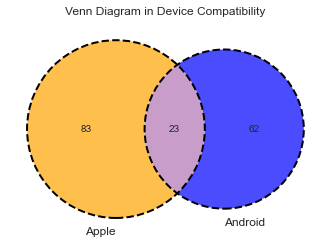

In [249]:
# depict venn diagram
venn2(subsets=(apple_compatible, android_compatible, overlapp), 
      set_labels=('Apple', 'Android'),
      set_colors=("orange", "blue"), alpha=0.7)
  
# add outline
venn2_circles(subsets=(apple_compatible, android_compatible, overlapp), 
              linestyle="dashed", 
              linewidth=2)
  
# assign title of the venn diagram
plt.title("Venn Diagram in Device Compatibility")
plt.savefig('Venn Diagram by Device Compatibility.jpeg')
plt.show()

In [250]:
dfUSB=newdf[newdf.Category=='USBCables'].reset_index(drop=True)

In [251]:
dfUSB['apple_compatibility']=pd.Series(list(map(apple, dfUSB['about_product'].apply(str))),index=dfUSB.index)

In [252]:
dfUSB[dfUSB['apple_compatibility']==True].Brand.value_counts(ascending=False).head(10)

Wayona          17
Portronics      11
AmazonBasics     8
Ambrane          7
Amazon           6
Duracell         6
boAt             5
Sounce           4
Amazonbasics     3
oraimo           2
Name: Brand, dtype: int64

In [287]:
fig = px.histogram(dfUSB[dfUSB.nylon==True], x="Brand", y="nylon", histfunc="count",color="Brand",text_auto=True).update_xaxes(categoryorder="total descending")
fig.update_layout(title_text='Nylon-made by Brand')
fig.write_image("images/fig12.png")
fig.show()

In [ ]:
fig = px.histogram(dfUSB[dfUSB.nylon==True], x="Brand", y="nylon", histfunc="count",color="Brand",text_auto=True).update_xaxes(categoryorder="total descending")
fig.update_layout(title_text='Nylon-made by Brand')
fig.write_image("images/fig12.png")
fig.show()

In [253]:
dfUSB['android_compatibility']=pd.Series(list(map(android, dfUSB['about_product'].apply(str))),index=dfUSB.index)

In [254]:
dfUSB['nylon']=pd.Series(list(map(nylon,dfUSB['about_product'].apply(str))),index=dfUSB.index)

In [255]:
dfUSB[dfUSB['nylon']==True].Brand.value_counts(ascending=False)

Portronics      19
Wayona          19
boAt            10
pTron            5
Zoul             4
AmazonBasics     4
Synqe            3
Wecool           2
Amazon           1
ESR              1
Agaro            1
realme           1
Name: Brand, dtype: int64

In [289]:
dfUSB['PVC']=pd.Series(list(map(PVC,dfUSB.about_product.apply(str))),index=dfUSB.index)
dfUSB['PVC']

0      False
1      False
2      False
3      False
4      False
       ...  
228    False
229     True
230    False
231    False
232    False
Name: PVC, Length: 233, dtype: bool

In [290]:
fig = px.histogram(dfUSB[dfUSB.PVC==True], x="Brand", y="PVC", histfunc="count",color="Brand",text_auto=True).update_xaxes(categoryorder="total descending")
fig.update_layout(title_text='PVC-made by Brand')
fig.write_image("images/fig13.png")
fig.show()

In [292]:
dfUSB['TPE']=pd.Series(list(map(TPE,dfUSB.about_product.apply(str))),index=dfUSB.index)
dfUSB['TPE']

0      False
1      False
2       True
3      False
4       True
       ...  
228    False
229    False
230    False
231    False
232    False
Name: TPE, Length: 233, dtype: bool

In [293]:
fig = px.histogram(dfUSB[dfUSB.TPE==True], x="Brand", y="TPE", histfunc="count",color="Brand",text_auto=True).update_xaxes(categoryorder="total descending")
fig.update_layout(title_text='TPE-made by Brand')
fig.write_image("images/fig14.png")
fig.show()

In [256]:
newdf['TypeC_index']=newdf[newdf.Category=='USBCables']['about_product'].str.find('Type C')

In [257]:
newdf.loc[(newdf.TypeC_index!= -1.0) & (newdf.Category=='USBCables')].shape[0]

65

In [273]:
dfUSB['TypeC_index']=dfUSB[dfUSB.Category=='USBCable']['about_product'].str.find('Type C')

In [275]:
dfUSB['TypeC_index'].value_counts()

Series([], Name: TypeC_index, dtype: int64)

In [271]:
df_value_counts_reset.Category.unique()

AttributeError: 'DataFrame' object has no attribute 'Category'

In [ ]:
fig = px.bar(df_value_counts_reset.sort_values('counts',ascending=False).head(10), x='counts', y='brand',text_auto=True,title='Barplot of Top 10 USB Brands')
fig.update_layout(xaxis={"categoryorder":"total descending"})
fig.write_image("images/fig8.png")
fig.show()

In [258]:
branddf = pd.DataFrame({'brand':list(newdf.loc[lambda newdf:newdf.Category=='USBCables']['product_name'].str.split(' ',expand=True).iloc[:,0].reset_index(drop=True))})
value_counts = branddf['brand'].value_counts(dropna=True, sort=False)

# solution here
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['brand', 'counts'] # change column names

In [270]:
fig = px.bar(df_value_counts_reset.sort_values('counts',ascending=False).head(10), x='counts', y='brand',text_auto=True,title='Barplot of Top 10 USB Brands')
fig.update_layout(xaxis={"categoryorder":"total descending"})
fig.write_image("images/fig8.png")
fig.show()

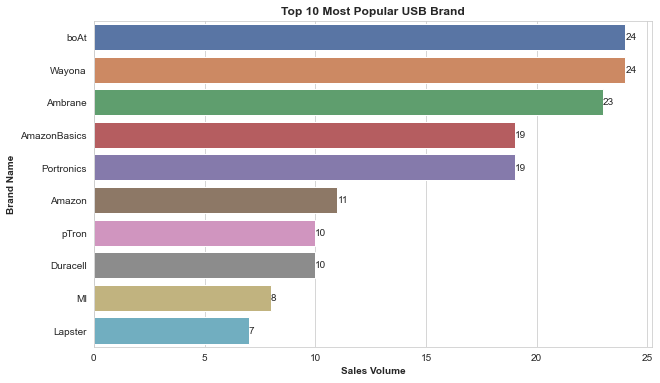

In [260]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df_value_counts_reset.sort_values('counts',ascending=False).head(10), x='counts', y='brand')
ax.set_title('Top 10 Most Popular USB Brand', fontweight='bold')
ax.set_xlabel('Sales Volume', fontweight='bold')
ax.set_ylabel('Brand Name', fontweight='bold')
ax.bar_label(ax.containers[0])
plt.tight_layout()
plt.
plt.show()

In [ ]:
newdf['Brand']=newdf.product_name.str.split(' ',expand=True).iloc[:,0]

In [ ]:
branddf = pd.DataFrame({'brand':list(newdf.loc[lambda newdf:newdf.Category=='Irons']['product_name'].str.split(' ',expand=True).iloc[:,0].reset_index(drop=True))})
value_counts = branddf['brand'].value_counts(dropna=True, sort=False)

# solution here
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['brand', 'counts'] # change column names

In [ ]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df_value_counts_reset.sort_values('counts',ascending=False).head(10), x='counts', y='brand')
ax.set_title('Top 10 Most Popular Iron Brand', fontweight='bold')
ax.set_xlabel('Sales Volume', fontweight='bold')
ax.set_ylabel('Brand Name', fontweight='bold')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
branddf = pd.DataFrame({'brand':list(newdf.loc[lambda newdf:newdf.Category=='HDMICables']['product_name'].str.split(' ',expand=True).iloc[:,0].reset_index(drop=True))})
value_counts = branddf['brand'].value_counts(dropna=True, sort=False)

# solution here
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['brand', 'counts'] # change column names

In [297]:
newdf['user_id']=newdf.user_id.str.split(',')
newdf['user_name']=newdf.user_name.str.split(',')

In [298]:
df1=newdf.copy()
df1=df1.explode('user_id')

In [299]:
df2=df1.loc[:, ~df1.columns.isin(['user_name','review_id','review_title','review_content','item_count'])].copy().reset_index(drop=True)

In [300]:
df2[['user_id','Category']].groupby('Category')['user_id']\
.count()\
.reset_index(name='count')\
.sort_values(['count'],ascending=False).head(10)

,Category,count
50,USBCables,1847
22,Irons,288
20,HDMICables,185
25,LintShavers,163
52,Vacuums,154
17,ElectricKettles,152
53,WallChargers,123
29,"Notebooks,WritingPads&Diaries",112
23,Kettle&ToasterSets,104
37,PowerBanks,96


In [305]:
fig=px.bar(df2[['user_id','Category']].groupby('Category')['user_id']\
.count()\
.reset_index(name='count')\
.sort_values(['count'],ascending=False).head(10),x='Category',y='count',title='Top 10 Popular products by Customer',text_auto=True)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.write_image("images/fig 15.png")
fig.show()

In [302]:
df2[['user_id','product_id']].groupby(['user_id'])['product_id']\
.count()\
.reset_index(name='count')\
.sort_values(['count'],ascending=False).head(10)

,user_id,count
227,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,11
4776,AG5DWPD54QGSLWJ6QUFERLPNAX4Q,11
8131,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,10
452,AEAMIR3CMSA32IDEINSJKHRNANTA,10
2333,AF355FTXYAKFH5NYPRTE7SL3WO3Q,10
3248,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,10
537,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,10
7853,AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,10
609,AECPFYFQVRUWC3KGNLJIOREFP5LQ,10
2842,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,9


In [303]:
fig = px.bar(df_value_counts_reset.sort_values('counts',ascending=False).head(10), x='brand', y='counts')
fig.show()

In [306]:
fig=px.bar(df2[['user_id','product_id']].groupby(['user_id'])['product_id']\
.count()\
.reset_index(name='count')\
.sort_values(['count'],ascending=False).head(10), x='count', y='user_id',text_auto=True,
          title="Top 10 active customers by products purchased")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.write_image("images/active customer.png")
fig.show()

In [307]:
active_customer=df2[['user_id','product_id']].groupby(['user_id'])['product_id']\
.count()\
.reset_index(name='count')\
.sort_values(['count'],ascending=False).head(10)
active_customer

,user_id,count
227,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,11
4776,AG5DWPD54QGSLWJ6QUFERLPNAX4Q,11
8131,AHMGAC6QM62UXNEOCZIHLHSXPP2Q,10
452,AEAMIR3CMSA32IDEINSJKHRNANTA,10
2333,AF355FTXYAKFH5NYPRTE7SL3WO3Q,10
3248,AFHROSCGIXUPV3FYQ7H5QOD46Q7Q,10
537,AEBWA5I4QFCA3P3OBEPMELBGN4GQ,10
7853,AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,10
609,AECPFYFQVRUWC3KGNLJIOREFP5LQ,10
2842,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,9


In [308]:
userlist=list(df2.user_id.unique())

In [309]:
list(df2[df2.user_id=='AE55KTFVNXYFD5FPYWP2OUPEYNPQ'].Category.unique())

['USBCables', None]

In [310]:
customer_propensity={_:list(df2[df2.user_id==_].Category.unique()) for _ in userlist}
customer_propensity

{'AG3D6O4STAQKAY2UVGEUV46KN35Q': ['USBCables'],
 'AHMY5CWJMMK5BJRBBSNLYT3ONILA': ['USBCables'],
 'AHCTC6ULH4XB6YHDY6PCH2R772LQ': ['USBCables'],
 'AGYHHIERNXKA6P5T7CZLXKVPT7IQ': ['USBCables'],
 'AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q': ['USBCables'],
 'AENGU523SXMOS7JPDTW52PNNVWGQ': ['USBCables'],
 'AEQJHCVTNINBS4FKTBGQRQTGTE5Q': ['USBCables'],
 'AFC3FFC5PKFF5PMA52S3VCHOZ5FQ': ['USBCables', None],
 'AECPFYFQVRUWC3KGNLJIOREFP5LQ': ['USBCables', 'OTGAdapters', None],
 'AGYYVPDD7YG7FYNBXNGXZJT525AQ': ['USBCables'],
 'AHONIZU3ICIEHQIGQ6R2VFRSBXOQ': ['USBCables'],
 'AFPHD2CRPDZMWMBL7WXRSVYWS5JA': ['USBCables'],
 'AEZ346GX3HJ4O4XNRPHCNHXQURMQ': ['USBCables'],
 'AEPSWFPNECKO34PUC7I56ITGXR6Q': ['USBCables'],
 'AHWVEHR5DYLVFTO2KF3IZATFQSWQ': ['USBCables'],
 'AH4QT33M55677I7ISQOAKEQWACYQ': ['USBCables'],
 'AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA': ['USBCables'],
 'AESFLDV2PT363T2AQLWQOWZ4N3OA': ['USBCables'],
 'AHTPQRIMGUD4BYR5YIHBH3CCGEFQ': ['USBCables'],
 'AEUVWXYP5LT7PZLLZENEO2NODPBQ': ['USBCables'],
 'AHC7MPW55DO

In [311]:
list(active_customer.user_id)

['AE55KTFVNXYFD5FPYWP2OUPEYNPQ',
 'AG5DWPD54QGSLWJ6QUFERLPNAX4Q',
 'AHMGAC6QM62UXNEOCZIHLHSXPP2Q',
 'AEAMIR3CMSA32IDEINSJKHRNANTA',
 'AF355FTXYAKFH5NYPRTE7SL3WO3Q',
 'AFHROSCGIXUPV3FYQ7H5QOD46Q7Q',
 'AEBWA5I4QFCA3P3OBEPMELBGN4GQ',
 'AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA',
 'AECPFYFQVRUWC3KGNLJIOREFP5LQ',
 'AFC3FFC5PKFF5PMA52S3VCHOZ5FQ']

In [312]:
for _ in active_customer.user_id.unique():
    print([_, customer_propensity[_]])

['AE55KTFVNXYFD5FPYWP2OUPEYNPQ', ['USBCables', None]]
['AG5DWPD54QGSLWJ6QUFERLPNAX4Q', ['USBCables', None]]
['AHMGAC6QM62UXNEOCZIHLHSXPP2Q', ['USBCables']]
['AEAMIR3CMSA32IDEINSJKHRNANTA', ['USBCables']]
['AF355FTXYAKFH5NYPRTE7SL3WO3Q', ['USBCables']]
['AFHROSCGIXUPV3FYQ7H5QOD46Q7Q', ['USBCables']]
['AEBWA5I4QFCA3P3OBEPMELBGN4GQ', ['USBCables']]
['AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA', ['USBCables']]
['AECPFYFQVRUWC3KGNLJIOREFP5LQ', ['USBCables', 'OTGAdapters', None]]
['AFC3FFC5PKFF5PMA52S3VCHOZ5FQ', ['USBCables', None]]


In [313]:
df2.loc[df2.user_id=='AE55KTFVNXYFD5FPYWP2OUPEYNPQ'][['user_id','product_id','discounted_price']]

,user_id,product_id,discounted_price
185,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,B09NHVCHS9,59.00
353,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,B09NJN8L25,59.00
649,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,B09NKZXMWJ,139.00
1389,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,B0B3N8VG24,88.00
1405,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,B0B3MQXNFB,57.89
1549,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,B08P9RYPLR,129.00
2003,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,B08N1WL9XW,182.00
3417,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,B07N8RQ6W7,134.00
3738,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,B09NHVCHS9,59.00
3802,AE55KTFVNXYFD5FPYWP2OUPEYNPQ,B09NL4DJ2Z,139.00


In [314]:
df2[df2.user_id=='AELNBR4H6235Y7NVYNCGNABDIDFQ'][['user_id','product_id','discounted_price']]

,user_id,product_id,discounted_price
491,AELNBR4H6235Y7NVYNCGNABDIDFQ,B0B15CPR37,32990.0
699,AELNBR4H6235Y7NVYNCGNABDIDFQ,B092BJMT8Q,30990.0
1519,AELNBR4H6235Y7NVYNCGNABDIDFQ,B0B15GSPQW,47990.0
2178,AELNBR4H6235Y7NVYNCGNABDIDFQ,B092BL5DCX,45999.0


In [315]:
list(df2[['user_id','discounted_price']].groupby(['user_id'])['discounted_price']\
.cumsum()\
.reset_index(name='monetary')\
.sort_values(['monetary'],ascending=False).head(10).index)


[2178, 2182, 2176, 2177, 2175, 2181, 2179, 2180, 2090, 2097]

In [316]:
agg_df = (
    # aggregate df by name and day
    df2.groupby(['user_id'], as_index=False)['discounted_price'].sum()
    .assign(
        # assign the cumulative sum of each name as a new column
        Monetary=lambda x: x.groupby('user_id')['discounted_price'].cumsum()
    )
)

In [317]:
agg_df.sort_values('Monetary',ascending=False).head(10)

,user_id,discounted_price,Monetary
5754,AGKZVBLHK472MSGAAUABFRZL7SYQ,157969.0,157969.0
3996,AFSII6HTAHTHGXERUNDOISNWZUNQ,157969.0,157969.0
78,AE3CFONNMANNC5QPYIAXV67EUYUQ,157969.0,157969.0
2334,AF35OXRSRJ335IGMNW5FYCJDLHOA,157969.0,157969.0
1246,AELNBR4H6235Y7NVYNCGNABDIDFQ,157969.0,157969.0
7482,AHDIDVECFGA6OQRNUBPUO6366UGQ,157969.0,157969.0
2553,AF64ON4HPPVD43H6PK3CHPTTYSSQ,157969.0,157969.0
7445,AHCWRQHRUAVMTMUH5NYNB3P4NWEA,157969.0,157969.0
2803,AFBK3X6D3AHEHSYYXPL4L6JEMSLQ,115495.0,115495.0
3633,AFNB6YVNGE6IT3AWQVSIG2TJ5L3Q,115495.0,115495.0


In [331]:
fig=px.bar(agg_df.sort_values('Monetary',ascending=False).head(10),x="Monetary",y="user_id",text_auto=True,title="Most Valuable Customers")
fig.update_traces(textfont_size=10, textangle=0, textposition="outside", cliponaxis=False)
fig.write_image("images/Most Valuable Cusomers.png")
fig.show()

In [318]:
mvp=list(agg_df.sort_values('Monetary',ascending=False).head(10)['user_id'])
mvp

['AGKZVBLHK472MSGAAUABFRZL7SYQ',
 'AFSII6HTAHTHGXERUNDOISNWZUNQ',
 'AE3CFONNMANNC5QPYIAXV67EUYUQ',
 'AF35OXRSRJ335IGMNW5FYCJDLHOA',
 'AELNBR4H6235Y7NVYNCGNABDIDFQ',
 'AHDIDVECFGA6OQRNUBPUO6366UGQ',
 'AF64ON4HPPVD43H6PK3CHPTTYSSQ',
 'AHCWRQHRUAVMTMUH5NYNB3P4NWEA',
 'AFBK3X6D3AHEHSYYXPL4L6JEMSLQ',
 'AFNB6YVNGE6IT3AWQVSIG2TJ5L3Q']

In [319]:
for _ in mvp:
    print([_, list(df2[df2.user_id==_].Root_Category.unique())])

['AGKZVBLHK472MSGAAUABFRZL7SYQ', ['Electronics']]
['AFSII6HTAHTHGXERUNDOISNWZUNQ', ['Electronics']]
['AE3CFONNMANNC5QPYIAXV67EUYUQ', ['Electronics']]
['AF35OXRSRJ335IGMNW5FYCJDLHOA', ['Electronics']]
['AELNBR4H6235Y7NVYNCGNABDIDFQ', ['Electronics']]
['AHDIDVECFGA6OQRNUBPUO6366UGQ', ['Electronics']]
['AF64ON4HPPVD43H6PK3CHPTTYSSQ', ['Electronics']]
['AHCWRQHRUAVMTMUH5NYNB3P4NWEA', ['Electronics']]
['AFBK3X6D3AHEHSYYXPL4L6JEMSLQ', ['Electronics']]
['AFNB6YVNGE6IT3AWQVSIG2TJ5L3Q', ['Electronics']]


In [320]:
df2[df2.user_id=='AGKZVBLHK472MSGAAUABFRZL7SYQ'][['user_id','product_id','Root_Category','discounted_price']]

,user_id,product_id,Root_Category,discounted_price
495,AGKZVBLHK472MSGAAUABFRZL7SYQ,B0B15CPR37,Electronics,32990.0
703,AGKZVBLHK472MSGAAUABFRZL7SYQ,B092BJMT8Q,Electronics,30990.0
1523,AGKZVBLHK472MSGAAUABFRZL7SYQ,B0B15GSPQW,Electronics,47990.0
2182,AGKZVBLHK472MSGAAUABFRZL7SYQ,B092BL5DCX,Electronics,45999.0


In [321]:
df2[df2.user_id=='AFBK3X6D3AHEHSYYXPL4L6JEMSLQ'][['user_id','product_id','Root_Category','Main_category','Brand','discounted_price']]

,user_id,product_id,Root_Category,Main_category,Brand,discounted_price
194,AFBK3X6D3AHEHSYYXPL4L6JEMSLQ,B0B1YVCJ2Y,Electronics,"Home Theater, T V & Video",Acer,11499.0
690,AFBK3X6D3AHEHSYYXPL4L6JEMSLQ,B0B1YZX72F,Electronics,"Home Theater, T V & Video",Acer,27999.0
1038,AFBK3X6D3AHEHSYYXPL4L6JEMSLQ,B0B1YY6JJL,Electronics,"Home Theater, T V & Video",Acer,23999.0
1353,AFBK3X6D3AHEHSYYXPL4L6JEMSLQ,B0B1YZ9CB8,Electronics,"Home Theater, T V & Video",Acer,32999.0
2092,AFBK3X6D3AHEHSYYXPL4L6JEMSLQ,B0BC9BW512,Electronics,"Home Theater, T V & Video",Acer,18999.0


In [322]:
reviewdf=newdf.copy()

In [323]:
reviewdf['review_id']=reviewdf.review_id.str.split(',')

In [324]:
reviewdf=reviewdf.explode('review_id').reset_index()

In [325]:
reviewdf.groupby(['Category'])['review_id'].count()\
.reset_index(name='Count')\
.sort_values('Count',ascending=False).head(10)

,Category,Count
50,USBCables,1847
22,Irons,288
20,HDMICables,185
25,LintShavers,163
52,Vacuums,154
17,ElectricKettles,152
53,WallChargers,123
29,"Notebooks,WritingPads&Diaries",112
23,Kettle&ToasterSets,104
37,PowerBanks,96


In [332]:
fig=px.bar(reviewdf[['Category','review_id']].groupby(['Category'])['review_id']\
.count()\
.reset_index(name='count')\
.sort_values(['count'],ascending=False).head(10), x='Category', y='count',text_auto=True,
          title="Top 10 Popular product by # of reviews")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.write_image('images/Most rated items.png')
fig.show()

In [333]:
reviewdf['rating'] = reviewdf['rating'].str.replace('|', '4.0').astype('float64')

In [334]:
reviewdf.rating_count=reviewdf.rating_count.str.replace(',','').astype('float64')

In [335]:
reviewdf[['Category','rating']].groupby(['Category'])['rating']\
.mean()\
.reset_index(name='Average_rating')\
.sort_values('Average_rating',ascending=False).head(10)

,Category,Average_rating
40,ScreenProtectors,4.471429
0,AirFryers,4.460000
10,CompleteTripodUnits,4.400000
43,SpeakerCables,4.400000
35,PhoneCharms,4.400000
33,Pens,4.400000
18,EthernetCables,4.400000
12,DVICables,4.400000
8,ColdPressJuicers,4.400000
28,MousePads,4.375000


In [337]:
fig=px.bar(reviewdf[['Category','rating']].groupby(['Category'])['rating']\
.mean()\
.reset_index(name='Average_rating')\
.sort_values('Average_rating',ascending=False).head(10), x='Average_rating', y='Category',text_auto=True,
          title="Top 10 Popular product by # of reviews")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.write_image('images/Highest Rated items.png')
fig.show()

In [341]:
review_category=list(reviewdf[['Category','rating']].groupby(['Category'])['rating']\
.mean()\
.reset_index(name='Average_rating')\
.sort_values('Average_rating',ascending=False).head(10)['Category'].unique())

In [342]:
reviewdf1=reviewdf[reviewdf.Category==review_category[0]]

In [343]:
reviewdf2=reviewdf[reviewdf.Category==review_category[1]]

In [344]:
reviewdf3=reviewdf[reviewdf.Category==review_category[2]]

In [345]:
reviewdf4=reviewdf[reviewdf.Category==review_category[3]]

In [346]:
reviewdf5=reviewdf[reviewdf.Category==review_category[4]]

In [347]:
reviewdf6=reviewdf[reviewdf.Category==review_category[5]]

In [348]:
reviewdf7=reviewdf[reviewdf.Category==review_category[6]]

In [349]:
reviewdf8=reviewdf[reviewdf.Category==review_category[7]]

In [350]:
reviewdf9=reviewdf[reviewdf.Category==review_category[8]]

In [351]:
reviewdf10=reviewdf[reviewdf.Category==review_category[9]]

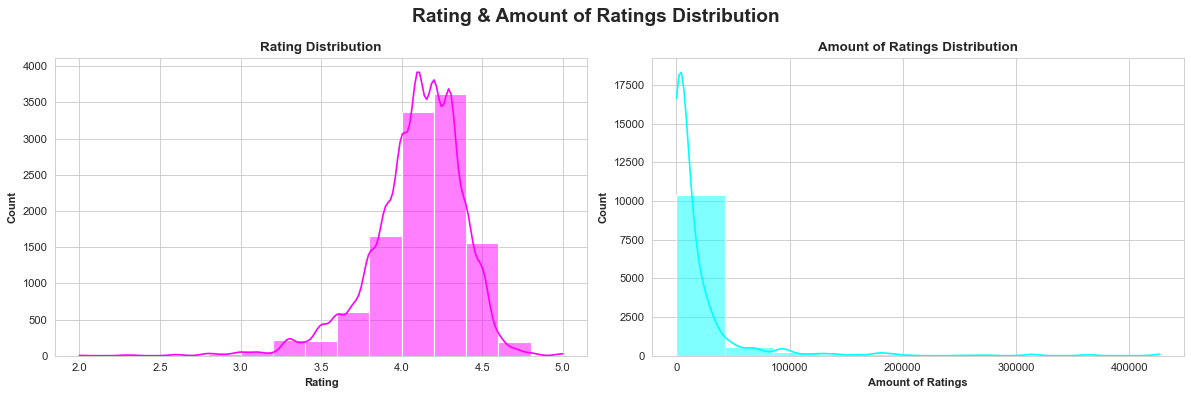

In [353]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5),dpi=80)

fig.suptitle('Rating & Amount of Ratings Distribution', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=reviewdf, x='rating', bins=15, kde=True, color='magenta')
sns.histplot(ax=ax[1], data=reviewdf, x='rating_count', bins=10, kde=True, color='cyan')

ax[0].set_xlabel('Rating', fontweight='bold')
ax[1].set_xlabel('Amount of Ratings', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Rating Distribution', fontweight='bold')
ax[1].set_title('Amount of Ratings Distribution', fontweight='bold')
plt.tight_layout()
plt.savefig('Overall Rating Distribution.png')
plt.show()

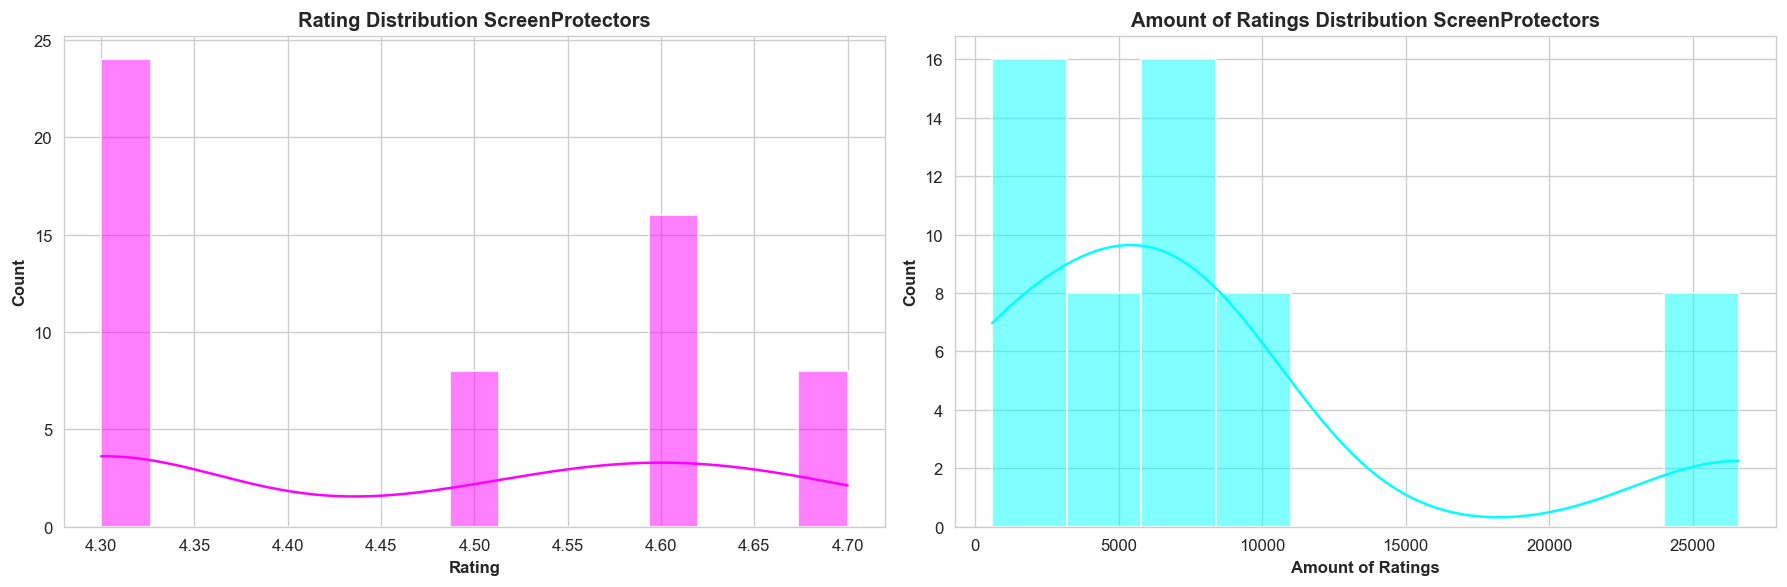

In [361]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5),dpi=120)

#fig.suptitle(f'Rating & Amount of Ratings Distribution for {review_category[0]}', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax[0], data=reviewdf1, x='rating', bins=15, kde=True, color='magenta')
sns.histplot(ax=ax[1], data=reviewdf1, x='rating_count', bins=10, kde=True, color='cyan')

ax[0].set_xlabel('Rating', fontweight='bold')
ax[1].set_xlabel('Amount of Ratings', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title(f'Rating Distribution {review_category[0]}', fontweight='bold')
ax[1].set_title(f'Amount of Ratings Distribution {review_category[0]}', fontweight='bold')
plt.tight_layout()
plt.savefig(f"Rating distribution of {review_category[0]}.png")
plt.show()



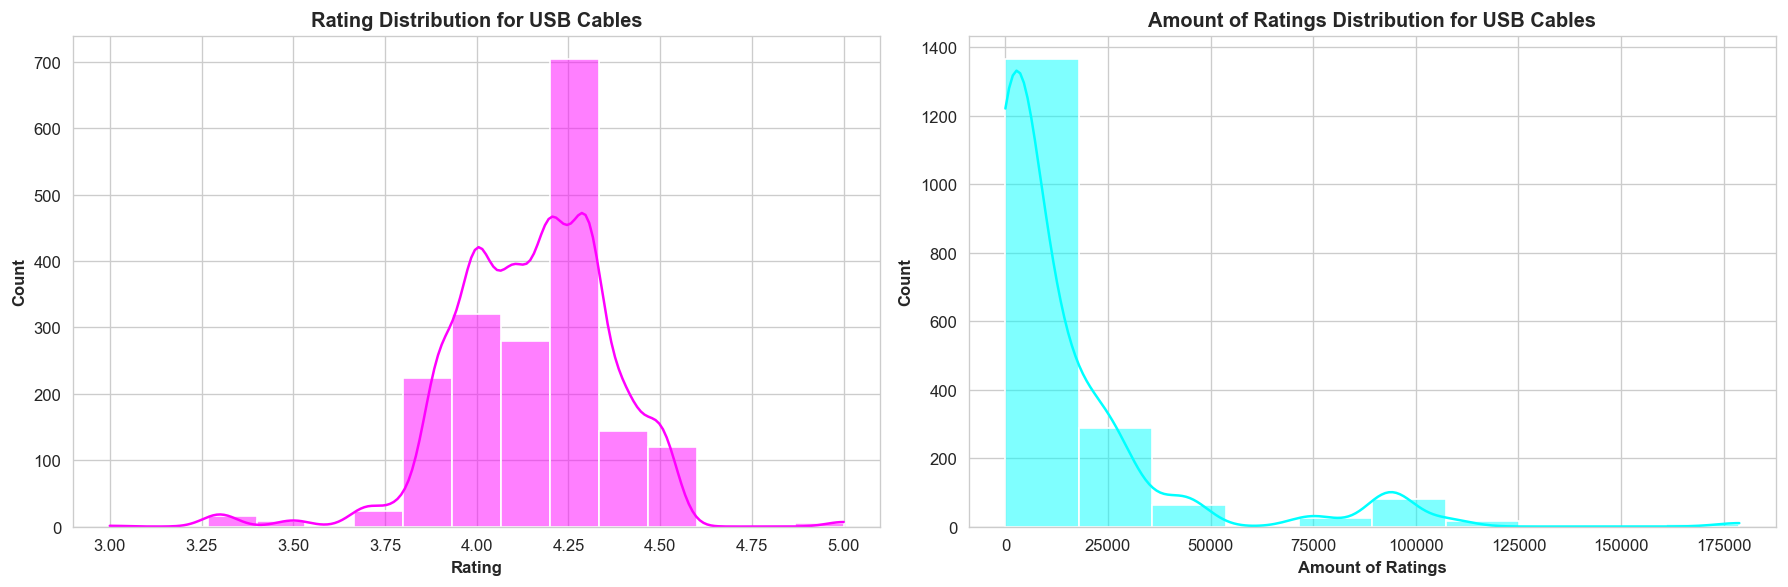

In [365]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5),dpi=120)

#fig.suptitle('Rating & Amount of Ratings Distribution for USB', fontweight='heavy', size='xx-large')



sns.histplot(ax=ax[0], data=reviewdf[reviewdf.Category=='USBCables'], x='rating', bins=15, kde=True, color='magenta')
sns.histplot(ax=ax[1], data=reviewdf[reviewdf.Category=='USBCables'], x='rating_count', bins=10, kde=True, color='cyan')

ax[0].set_xlabel('Rating', fontweight='bold')
ax[1].set_xlabel('Amount of Ratings', fontweight='bold')

ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')

ax[0].set_title('Rating Distribution for USB Cables', fontweight='bold')
ax[1].set_title('Amount of Ratings Distribution for USB Cables', fontweight='bold')

plt.tight_layout()
plt.savefig("Rating Distribution for USB Cables")
plt.show()



In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5),dpi=120)

fig.suptitle(f'Rating & Amount of Ratings Distribution for {review_category[1]}', fontweight='heavy', size='xx-large')

fig.tight_layout(pad=3.0)

sns.histplot(ax=ax, data=reviewdf2, x='rating', bins=15, kde=True, color='magenta')
# sns.histplot(ax=ax[1], data=reviewdf1, x='rating_count', bins=10, kde=True, color='cyan')

ax.set_xlabel('Rating', fontweight='bold')
# ax[1].set_xlabel('Amount of Ratings', fontweight='bold')

ax.set_ylabel('Count', fontweight='bold')
# ax[1].set_ylabel('Count', fontweight='bold')

ax.set_title('Rating Distribution', fontweight='bold')
# ax[1].set_title('Amount of Ratings Distribution', fontweight='bold')

plt.show()

